ANALYSIS OF NETWORK HOSPITALS ENROLLED BY TPAS

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('/content/NETWORK HOSPITAL ENROLLED BY TPAs - Sheet1 (1).csv')

In [111]:
df

Name of the TPA  \
0                Anmol Medicare Insurance TPA Limited   
1      East West Assist Insurance TPA Private Limited   
2               Ericson Insurance TPA Private Limited   
3            Family Health Plan Insurance TPA Limited   
4                  Genins India Insurance TPA Limited   
5                   Good Health Insurance TPA Limited   
6   Health India Insurance TPA Services Private Li...   
7               Health Insurance TPA of India Limited   
8       Heritage Health Insurance TPA Private Limited   
9        MDIndia Health Insurance TPA Private Limited   
10          Medi Assist Insurance TPA Private Limited   
11               Medsave Health Insurance TPA Limited   
12  Paramount Health Services & Insurance TPA Priv...   
13       Park Mediclaim Insurance TPA Private Limited   
14        Raksha Health Insurance TPA Private Limited   
15                   Rothshield Insurance TPA Limited   
16              Safeway Insurance TPA Private Limited   
17  United Health Care Parekh Insurance TPA Privat...   
18         Vidal Health Insurance TPA Private Limited   
19       Vipul Medcorp Insurance TPA Private Limited*   
20       Vision Digital Insurance TPA Private Limited   

   Number of hospitals in 2021 Additions during 2021-22  \
0                          559                       30   
1                         5233                       76   
2                         8857                     1225   
3                        16089                     1556   
4                         5241                      474   
5                         6574                      232   
6                         9336                     1423   
7                         5941                      281   
8                         9630                     2501   
9                        15719                     5216   
10                       12266                     4521   
11                        9287                      463   
12                       16919                     3227   
13                        4271                      202   
14                        8724                      318   
15                        4271                      415   
16                        7192                     1248   
17                        5501                      604   
18                        7981                     2558   
19                           -                        -   
20                        4957                       62   

   Withdrawal / Removal during 2021-22 Number of hospitals in 2022  
0                                    -                         589  
1                                    5                        5304  
2                                    -                       10082  
3                                  115                       17530  
4                                  338                        5377  
5                                   56                        6750  
6                                  275                       10484  
7                                    4                        6218  
8                                  537                       11594  
9                                 3178                       17757  
10                                2431                       14356  
11                                  73                        9677  
12                                 137                       20009  
13                                   -                        4473  
14                                  67                        8975  
15                                  21                        4665  
16                                 425                        8015  
17                                  38                        6067  
18                                 123                       10416  
19                                   -                           -  
20                                 

In [112]:

# Convert relevant columns to numeric, handling non-numeric values
df['Number of hospitals in 2021'] = pd.to_numeric(df['Number of hospitals in 2021'], errors='coerce')
df['Additions during 2021-22'] = pd.to_numeric(df['Additions during 2021-22'], errors='coerce')
df['Withdrawal / Removal during 2021-22'] = pd.to_numeric(df['Withdrawal / Removal during 2021-22'], errors='coerce').fillna(0)
df['Number of hospitals in 2022'] = pd.to_numeric(df['Number of hospitals in 2022'], errors='coerce')

# Calculate net changes
df['Net Change'] = df['Additions during 2021-22'] - df['Withdrawal / Removal during 2021-22']




In [113]:
# Check the data types of your columns
print(df.info())

# Check for any missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name of the TPA                      21 non-null     object 
 1   Number of hospitals in 2021          20 non-null     float64
 2   Additions during 2021-22             20 non-null     float64
 3   Withdrawal / Removal during 2021-22  21 non-null     float64
 4   Number of hospitals in 2022          20 non-null     float64
 5   Net Change                           20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB
None
Name of the TPA                        0
Number of hospitals in 2021            1
Additions during 2021-22               1
Withdrawal / Removal during 2021-22    0
Number of hospitals in 2022            1
Net Change                             1
dtype: int64


In [114]:
# Calculate net changes
df['Net Change'] = df['Additions during 2021-22'] - df['Withdrawal / Removal during 2021-22']


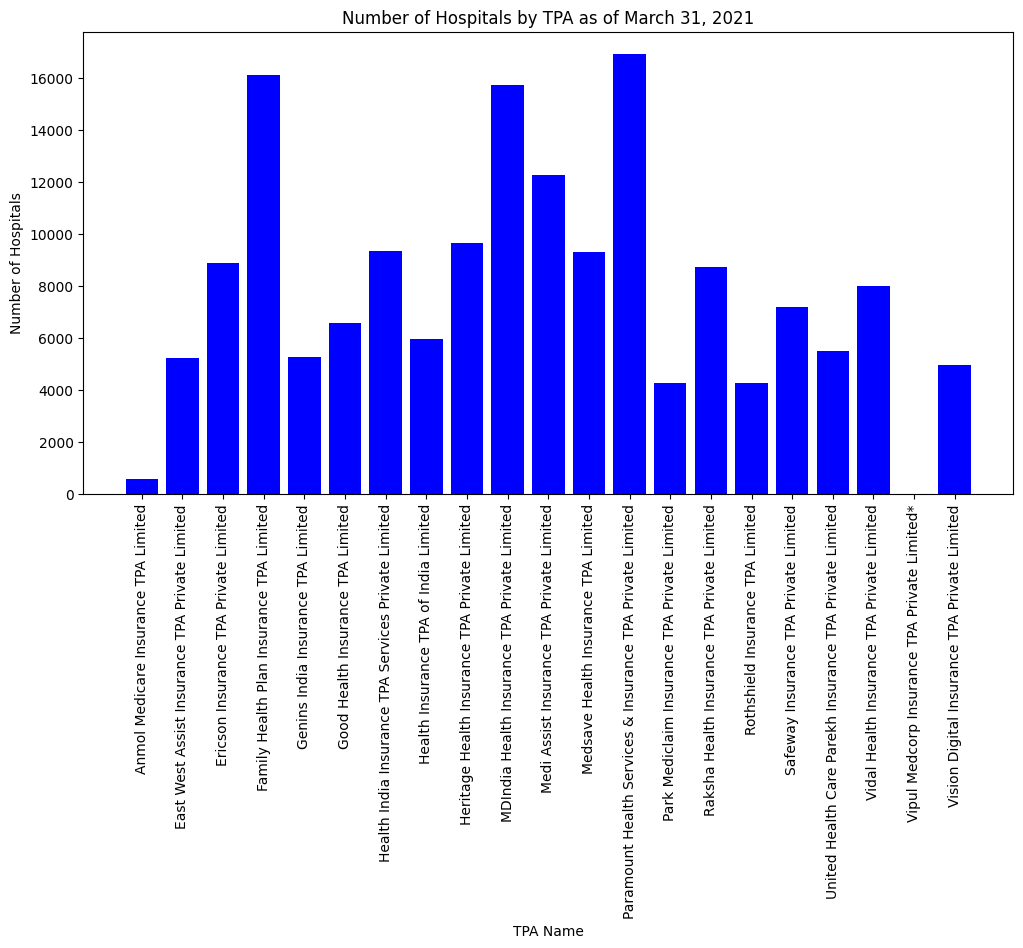

In [115]:

# Bar Plot for Number of Hospitals as of March 31, 2021
plt.figure(figsize=(12, 6))
plt.bar(df['Name of the TPA'], df['Number of hospitals in 2021'], color='blue')
plt.xlabel('TPA Name')
plt.ylabel('Number of Hospitals')
plt.title('Number of Hospitals by TPA as of March 31, 2021')
plt.xticks(rotation=90)
plt.show()


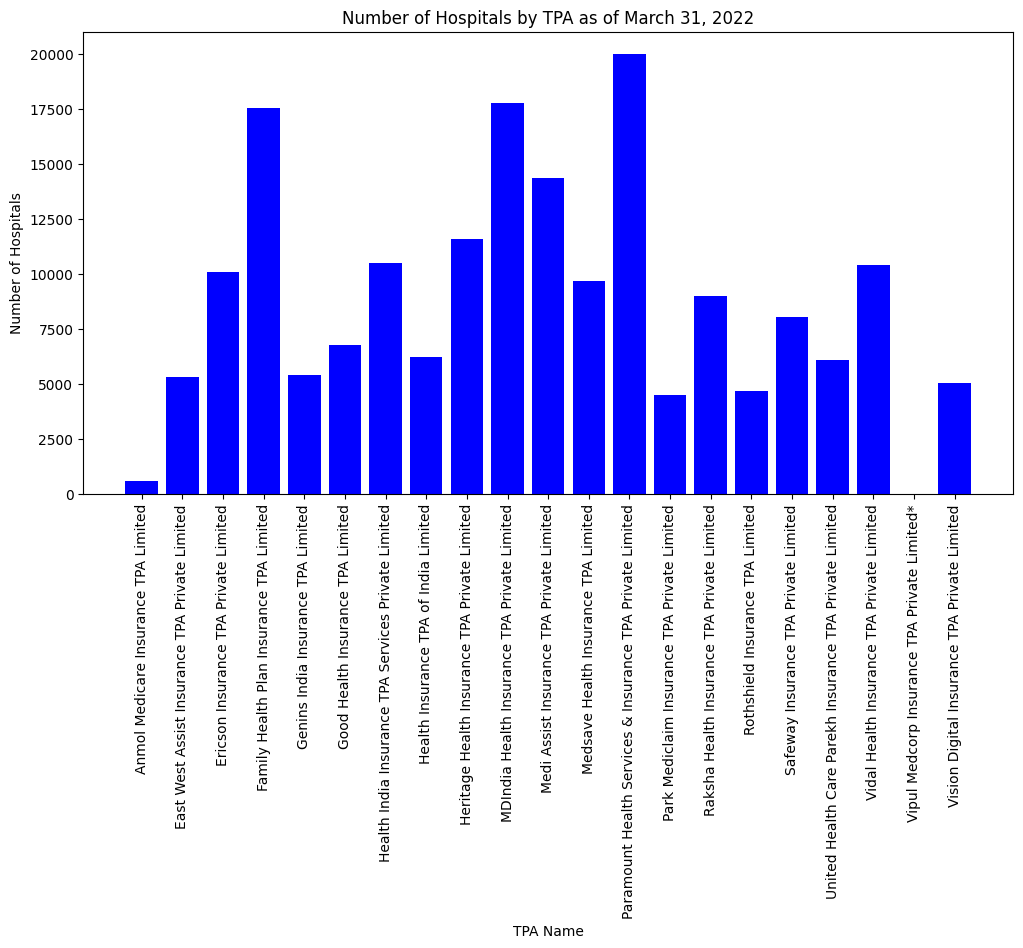

In [116]:

# Bar Plot for Number of Hospitals as of March 31, 2022
plt.figure(figsize=(12, 6))
plt.bar(df['Name of the TPA'], df['Number of hospitals in 2022'], color='blue')
plt.xlabel('TPA Name')
plt.ylabel('Number of Hospitals')
plt.title('Number of Hospitals by TPA as of March 31, 2022')
plt.xticks(rotation=90)
plt.show()


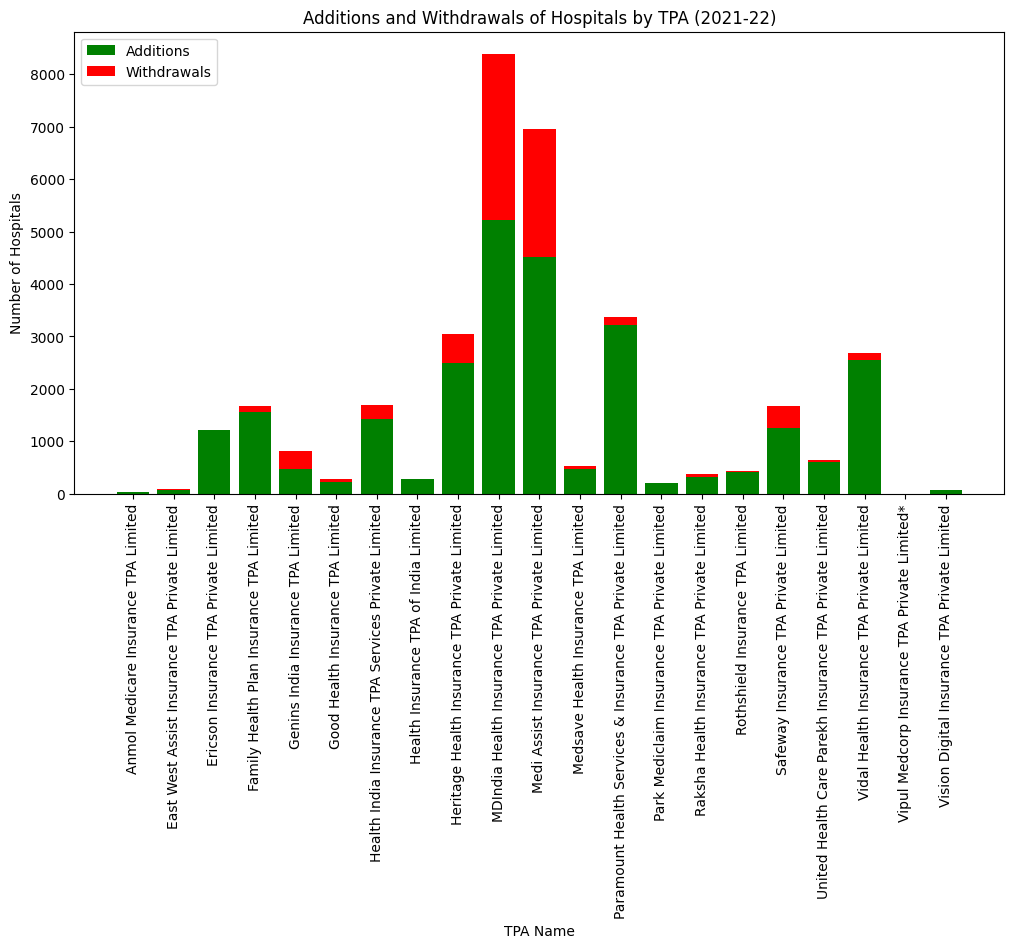

In [117]:

# Stacked Bar Plot for Additions and Withdrawals
plt.figure(figsize=(12, 6))
plt.bar(df['Name of the TPA'], df['Additions during 2021-22'], color='green', label='Additions')
plt.bar(df['Name of the TPA'], df['Withdrawal / Removal during 2021-22'],
        bottom=df['Additions during 2021-22'], color='red', label='Withdrawals')

plt.xlabel('TPA Name')
plt.ylabel('Number of Hospitals')
plt.title('Additions and Withdrawals of Hospitals by TPA (2021-22)')
plt.xticks(rotation=90)
plt.legend()
plt.show()


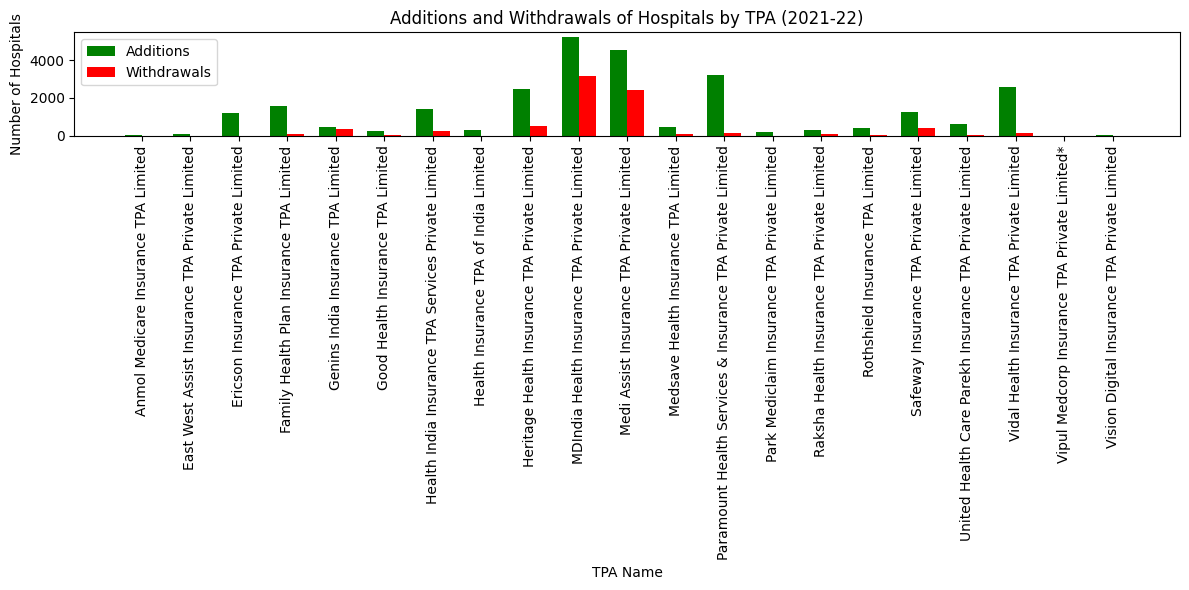

In [118]:

# Data for plotting
TPAs = df['Name of the TPA']
additions = df['Additions during 2021-22']
withdrawals = df['Withdrawal / Removal during 2021-22']

# Set the bar width and positions
bar_width = 0.35
index = np.arange(len(TPAs))

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(index, additions, bar_width, label='Additions', color='green')
plt.bar(index + bar_width, withdrawals, bar_width, label='Withdrawals', color='red')

# Add labels and title
plt.xlabel('TPA Name')
plt.ylabel('Number of Hospitals')
plt.title('Additions and Withdrawals of Hospitals by TPA (2021-22)')
plt.xticks(index + bar_width / 2, TPAs, rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


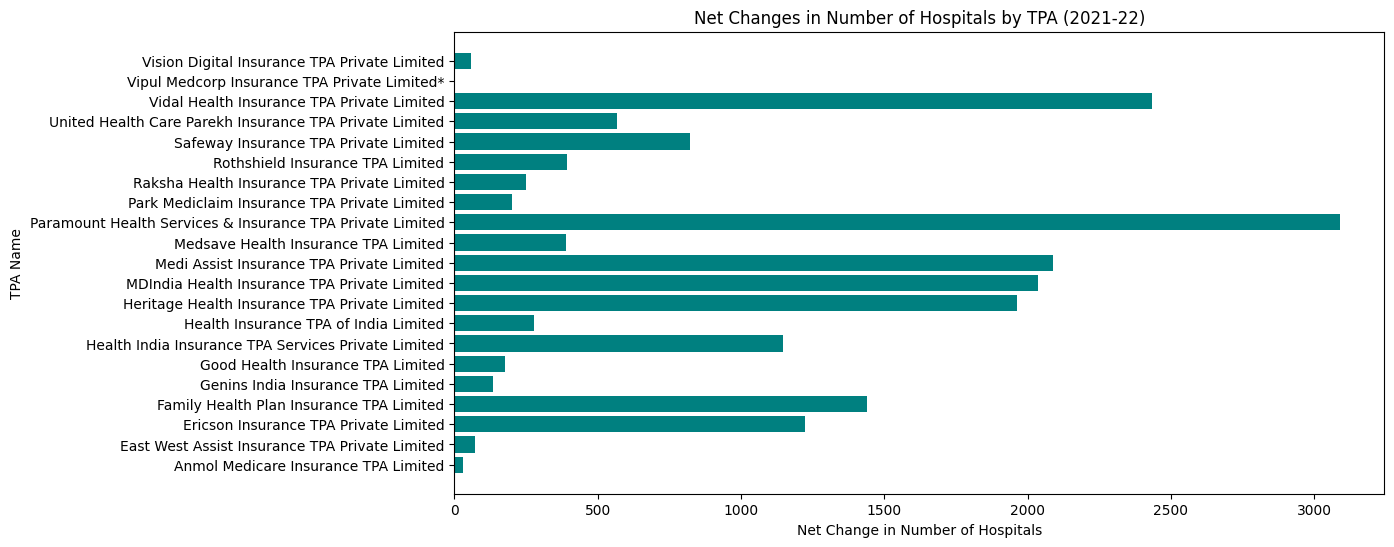

In [119]:

# Horizontal Bar Plot for Net Changes
plt.figure(figsize=(12, 6))
plt.barh(df['Name of the TPA'], df['Net Change'], color='teal')
plt.xlabel('Net Change in Number of Hospitals')
plt.ylabel('TPA Name')
plt.title('Net Changes in Number of Hospitals by TPA (2021-22)')
plt.show()


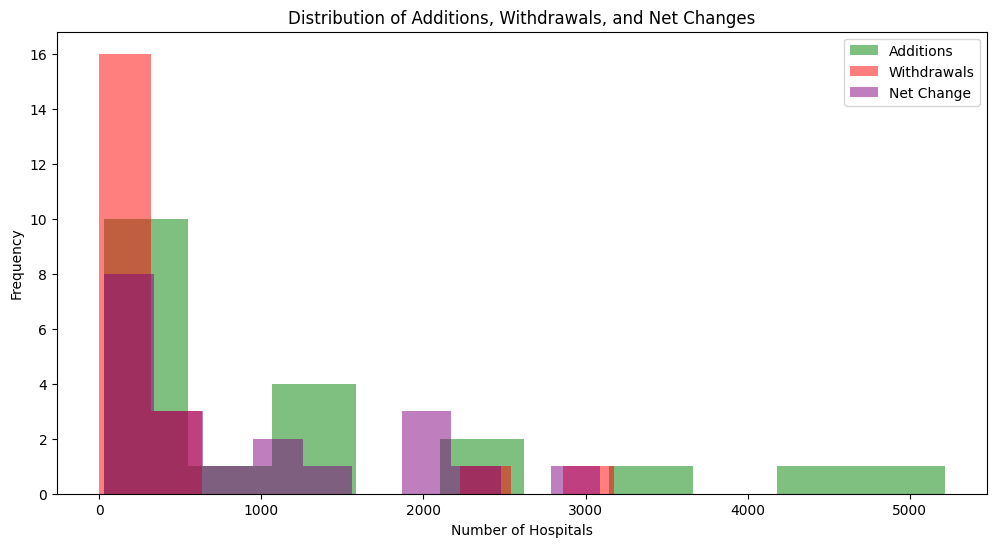

In [120]:

# Histogram of Additions, Withdrawals, and Net Changes
plt.figure(figsize=(12, 6))
plt.hist(df['Additions during 2021-22'], bins=10, alpha=0.5, label='Additions', color='green')
plt.hist(df['Withdrawal / Removal during 2021-22'], bins=10, alpha=0.5, label='Withdrawals', color='red')
plt.hist(df['Net Change'], bins=10, alpha=0.5, label='Net Change', color='purple')

plt.xlabel('Number of Hospitals')
plt.ylabel('Frequency')
plt.title('Distribution of Additions, Withdrawals, and Net Changes')
plt.legend()
plt.show()


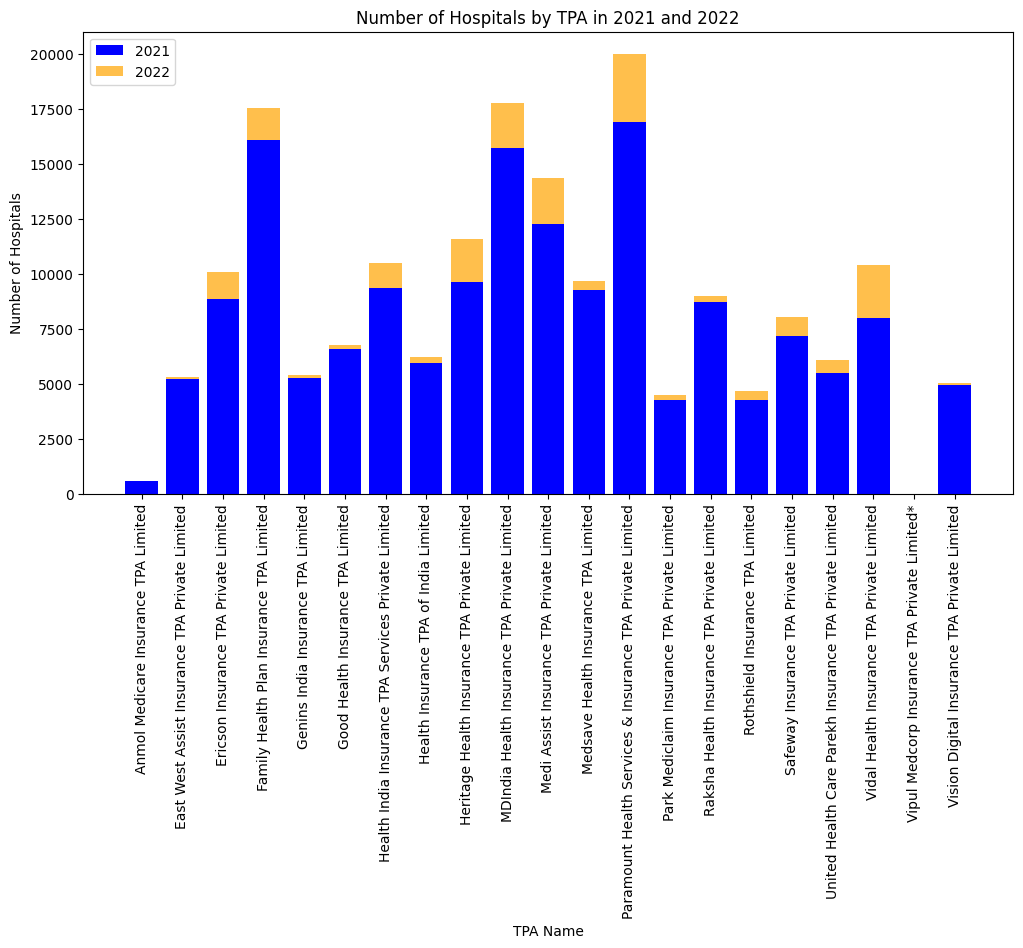

In [121]:

# Bar Plot for Number of Hospitals in 2021 and 2022
plt.figure(figsize=(12, 6))
plt.bar(df['Name of the TPA'], df['Number of hospitals in 2021'], color='blue', label='2021')
plt.bar(df['Name of the TPA'], df['Number of hospitals in 2022'] - df['Number of hospitals in 2021'],
        bottom=df['Number of hospitals in 2021'], color='orange', alpha=0.7, label='2022')

plt.xlabel('TPA Name')
plt.ylabel('Number of Hospitals')
plt.title('Number of Hospitals by TPA in 2021 and 2022')
plt.xticks(rotation=90)
plt.legend()
plt.show()


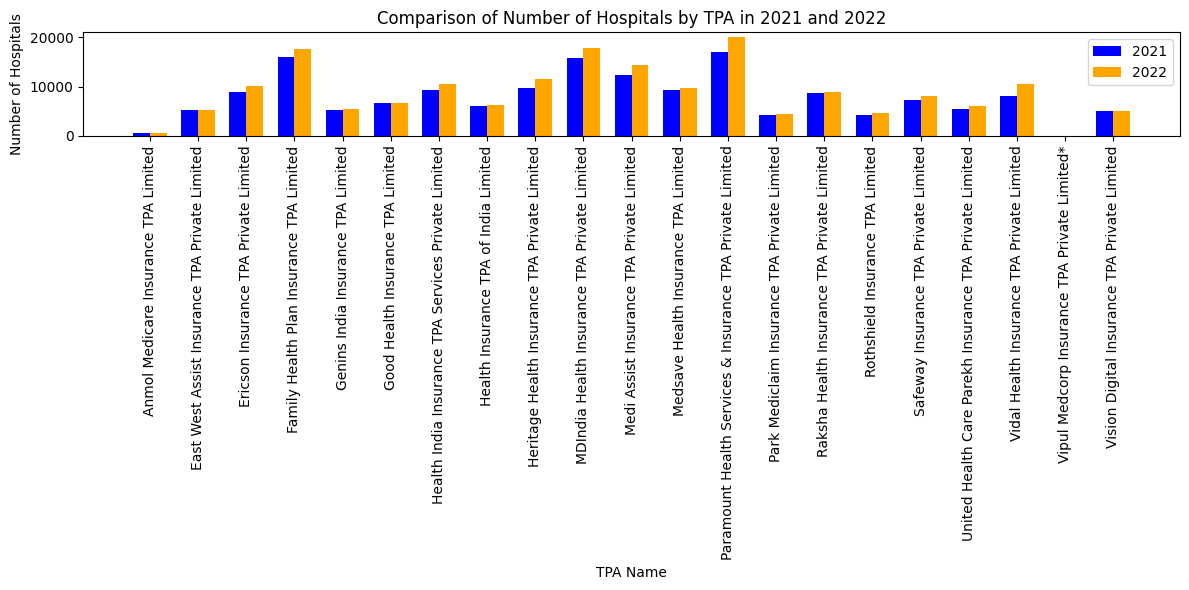

In [122]:

# Data
TPAs = df['Name of the TPA']
hospitals_2021 = df['Number of hospitals in 2021']
hospitals_2022 = df['Number of hospitals in 2022']

# Set the bar width and positions
bar_width = 0.35
index = np.arange(len(TPAs))

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(index, hospitals_2021, bar_width, label='2021', color='blue')
plt.bar(index + bar_width, hospitals_2022, bar_width, label='2022', color='orange')

# Add labels and title
plt.xlabel('TPA Name')
plt.ylabel('Number of Hospitals')
plt.title('Comparison of Number of Hospitals by TPA in 2021 and 2022')
plt.xticks(index + bar_width / 2, TPAs, rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


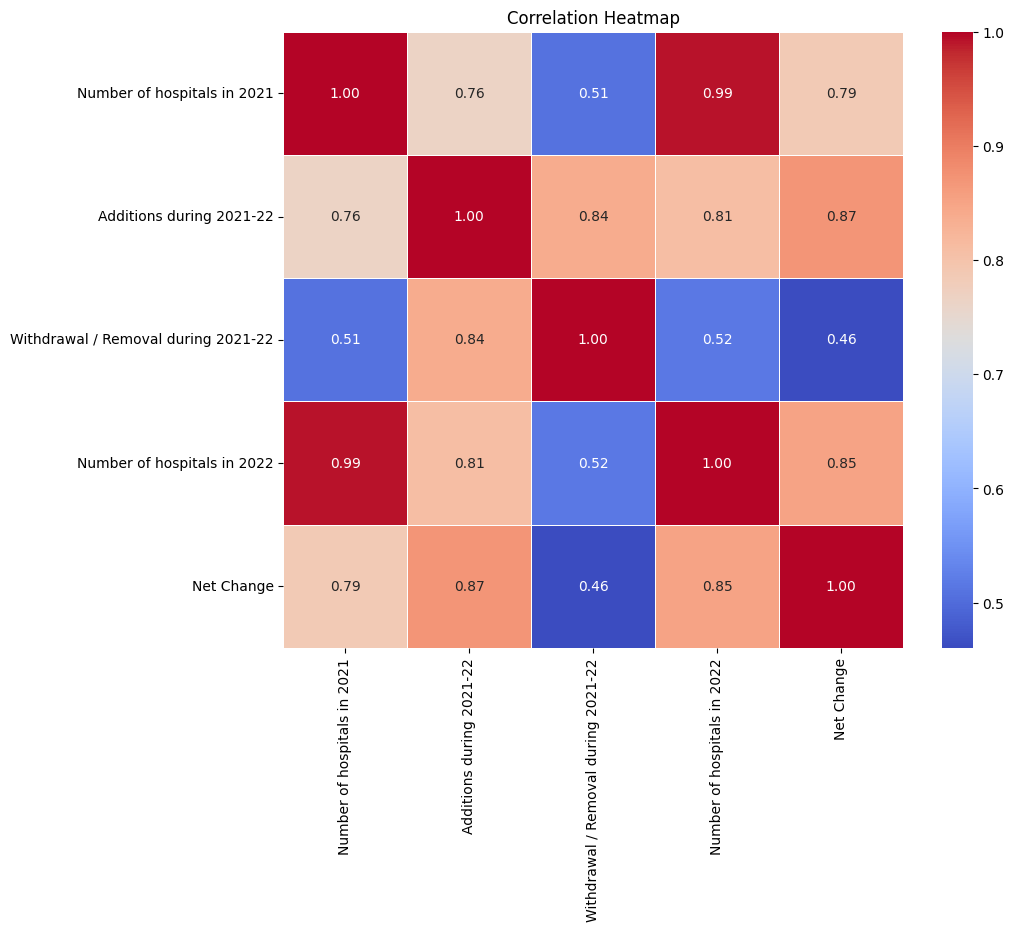

In [123]:

# Heatmap for Correlation between Variables
plt.figure(figsize=(10, 8))
corr = df[['Number of hospitals in 2021', 'Additions during 2021-22', 'Withdrawal / Removal during 2021-22', 'Number of hospitals in 2022', 'Net Change']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [124]:

# Convert to numeric, and fill NaN with zero
df['Number of hospitals in 2022'] = pd.to_numeric(df['Number of hospitals in 2022'], errors='coerce').fillna(0)


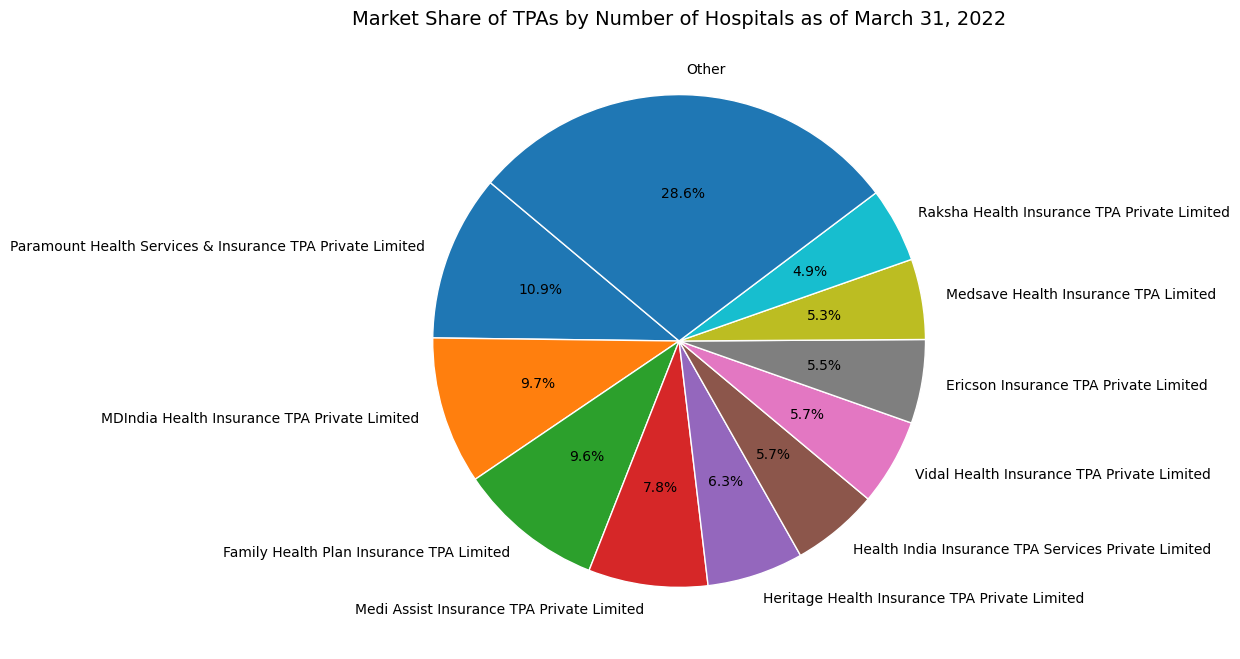

In [125]:

# Ensure 'df' is being used and correct any potential column names or operations
df['Number of hospitals in 2022'] = pd.to_numeric(df['Number of hospitals in 2022'], errors='coerce').fillna(0)

# Simplify by showing only top 10 TPAs and grouping the rest as 'Other'
df_sorted = df.sort_values(by='Number of hospitals in 2022', ascending=False)
top_10 = df_sorted.head(10)
other_sum = df_sorted.iloc[10:]['Number of hospitals in 2022'].sum()

# Creating a DataFrame for the "Other" category
other = pd.DataFrame({
    'Name of the TPA': ['Other'],
    'Number of hospitals in 2022': [other_sum]
})

# Concatenate the top 10 with the 'Other' category
top_10_with_other = pd.concat([top_10, other], ignore_index=True)

# Plot the simplified pie chart
plt.figure(figsize=(12, 8))
plt.pie(
    top_10_with_other['Number of hospitals in 2022'],
    labels=top_10_with_other['Name of the TPA'],
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Market Share of TPAs by Number of Hospitals as of March 31, 2022', fontsize=14)
plt.show()


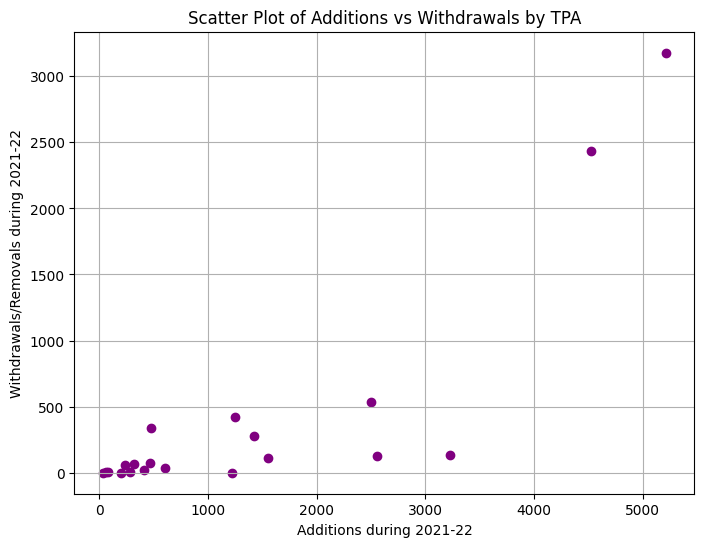

In [126]:

# Scatter Plot for Additions vs. Withdrawals
plt.figure(figsize=(8, 6))
plt.scatter(df['Additions during 2021-22'], df['Withdrawal / Removal during 2021-22'], color='purple')
plt.xlabel('Additions during 2021-22')
plt.ylabel('Withdrawals/Removals during 2021-22')
plt.title('Scatter Plot of Additions vs Withdrawals by TPA')
plt.grid(True)
plt.show()


ANALYSIS OF CLAIMS DEVELOPMENT AND AGING

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv("/content/claims develepment - Sheet1.csv")
df1

Details of Claims Development  \
0  Claims outstanding at the beginning of the FY   
1            New claims registered during the FY   
2                      Claims paid during the FY   
3                              Claims Disallowed   
4                Claims repudiated during the FY   
5        Claims outstanding at the end of the FY   
6                            Penal Interest Paid   

   For Claims Handled through TPAs Total Number (2016-17)  \
0                                             464977        
1                                            9847967        
2                                            8408135        
3                                                  0        
4                                            1091221        
5                                             813589        
6                                                168        

   For Claims Handled through TPAs Total Amount (2016-17)  \
0                                             186317        
1                                            2537655        
2                                            2077626        
3                                                  0        
4                                             285779        
5                                             235441        
6                                                  0        

   For Claims handled directly Total number (2016-17)  \
0                                           239572.0    
1                                          2886855.0    
2                                          2630935.0    
3                                                NaN    
4                                           275761.0    
5                                           220249.0    
6                                              197.0    

   For Claims handled directly Total amount (2016-17)  \
0                                            63209.0    
1                                           851169.0    
2                                           674745.0    
3                                                NaN    
4                                           133134.0    
5                                            75464.0    
6                                                0.0    

   For Claims Handled through TPAs Total Number (2017-18)  \
0                                             251860        
1                                            3864714        
2                                            2662081        
3                                             604434        
4                                             621626        
5                                             228432        
6                                              19732        

   For Claims Handled through TPAs Total Amount (2017-18)  \
0                                           153417.0        
1                                          2398330.0        
2                                          2096011.0        
3                                                NaN        
4                                           236240.0        
5                                           210933.0        
6                                                0.0        

   For Claims handled directly Total number (2017-18)  \
0                                           241312.0    
1                                          4667943.0    
2                                          4212153.0    
3                                                NaN    
4                                           339467.0    
5                                           357636.0    
6                                                0.0    

   For Claims handled directly Total amount  (2017-18)  \
0                                            94941.0     
1                                          1251866.0     
2                                           928393.0     
3                                          

In [128]:
# Handle missing values if any (optional step)
df1.fillna(0, inplace=True)
df1['Year'] = pd.Series([2016, 2017, 2018, 2019, 2020, 2021])

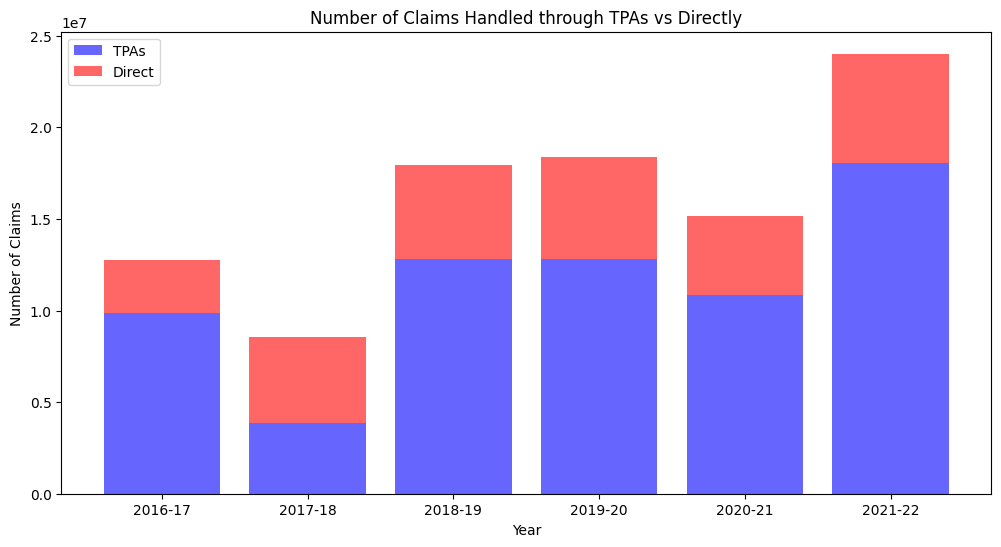

In [129]:
def plot_claims_number_stacked_bar(df1):
    # Extract relevant columns
    tpa_cols = [col for col in df1.columns if 'Total Number' in col and 'TPAs' in col]
    direct_cols = [col for col in df1.columns if 'Total number' in col and 'directly' in col]

    # Data for plotting
    tpa_data = df1.loc[df1['Details of Claims Development'] == 'New claims registered during the FY', tpa_cols].values.flatten()
    direct_data = df1.loc[df1['Details of Claims Development'] == 'New claims registered during the FY', direct_cols].values.flatten()

    years = [col.split(' ')[-1].strip('()') for col in tpa_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(years, tpa_data, label='TPAs', color='b', alpha=0.6)
    plt.bar(years, direct_data, bottom=tpa_data, label='Direct', color='r', alpha=0.6)
    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Number of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_claims_number_stacked_bar(df1)


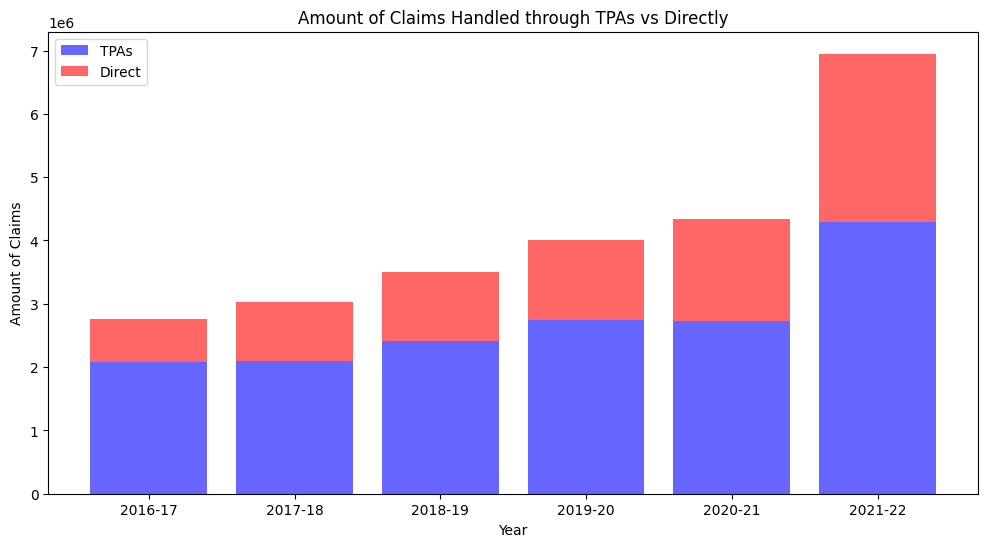

In [130]:
def plot_claims_amount_stacked_bar(df1):
    # Extract relevant columns
    tpa_cols = [col for col in df1.columns if 'Total Amount' in col and 'TPAs' in col]
    direct_cols = [col for col in df1.columns if 'Total amount' in col and 'directly' in col]

    # Data for plotting
    tpa_data = df1.loc[df1['Details of Claims Development'] == 'Claims paid during the FY', tpa_cols].values.flatten()
    direct_data = df1.loc[df1['Details of Claims Development'] == 'Claims paid during the FY', direct_cols].values.flatten()

    years = [col.split(' ')[-1].strip('()') for col in tpa_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(years, tpa_data, label='TPAs', color='b', alpha=0.6)
    plt.bar(years, direct_data, bottom=tpa_data, label='Direct', color='r', alpha=0.6)
    plt.xlabel('Year')
    plt.ylabel('Amount of Claims')
    plt.title('Amount of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_claims_amount_stacked_bar(df1)


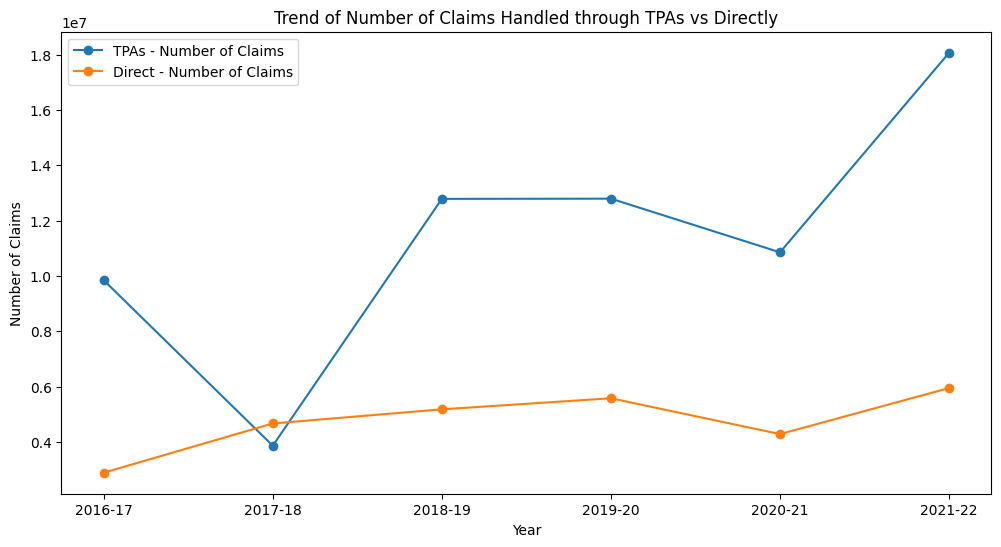

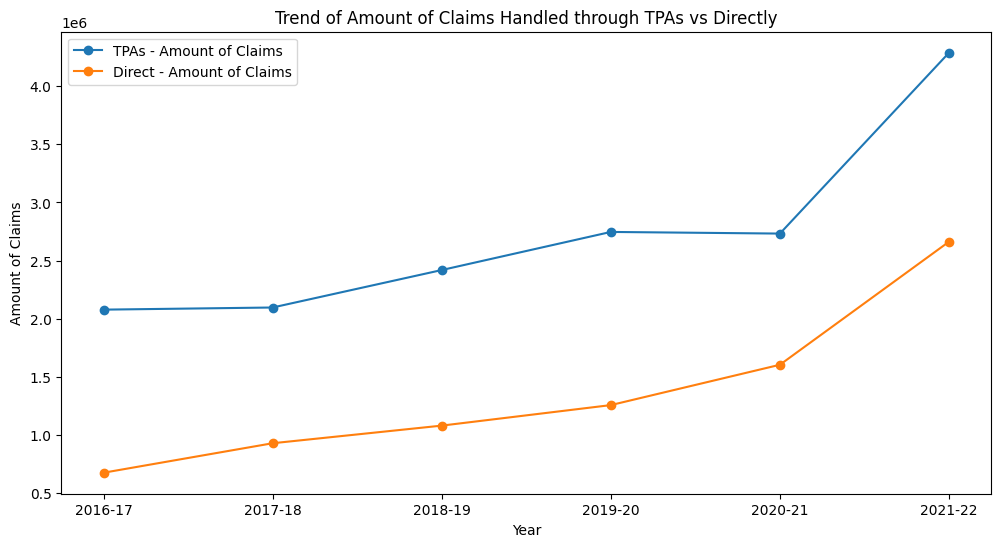

In [131]:
def plot_aggregated_trends(df1):
    # Extract relevant columns
    tpa_number_cols = [col for col in df1.columns if 'Total Number' in col and 'TPAs' in col]
    direct_number_cols = [col for col in df1.columns if 'Total number' in col and 'directly' in col]
    tpa_amount_cols = [col for col in df1.columns if 'Total Amount' in col and 'TPAs' in col]
    direct_amount_cols = [col for col in df1.columns if 'Total amount' in col and 'directly' in col]

    # Data for plotting
    tpa_number_data = df1.loc[df1['Details of Claims Development'] == 'New claims registered during the FY', tpa_number_cols].values.flatten()
    direct_number_data = df1.loc[df1['Details of Claims Development'] == 'New claims registered during the FY', direct_number_cols].values.flatten()
    tpa_amount_data = df1.loc[df1['Details of Claims Development'] == 'Claims paid during the FY', tpa_amount_cols].values.flatten()
    direct_amount_data = df1.loc[df1['Details of Claims Development'] == 'Claims paid during the FY', direct_amount_cols].values.flatten()

    years = [col.split(' ')[-1].strip('()') for col in tpa_number_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(years, tpa_number_data, label='TPAs - Number of Claims', marker='o')
    plt.plot(years, direct_number_data, label='Direct - Number of Claims', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Trend of Number of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(years, tpa_amount_data, label='TPAs - Amount of Claims', marker='o')
    plt.plot(years, direct_amount_data, label='Direct - Amount of Claims', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Amount of Claims')
    plt.title('Trend of Amount of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_aggregated_trends(df1)


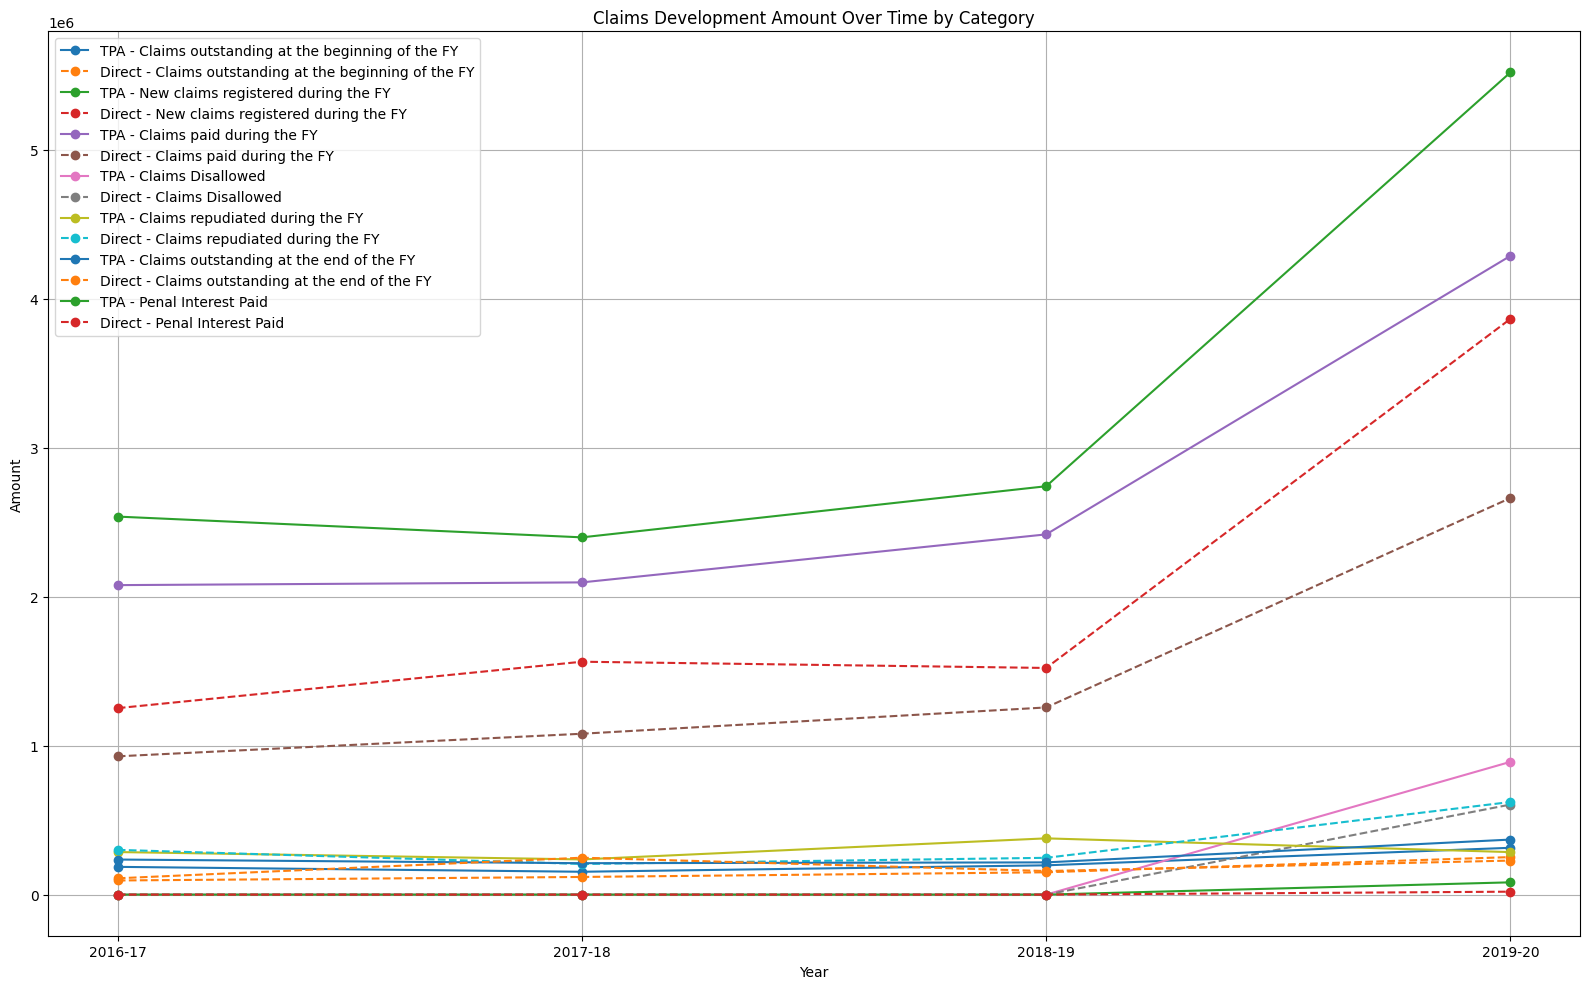

In [132]:

def plot_claims_amount_line_df1(df):
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
    rows_to_plot = ['Claims outstanding at the beginning of the FY', 'New claims registered during the FY',
                    'Claims paid during the FY', 'Claims Disallowed', 'Claims repudiated during the FY',
                    'Claims outstanding at the end of the FY', 'Penal Interest Paid']

    plt.figure(figsize=(16, 10))
    for ageing in rows_to_plot:
        tpa_columns = [f'For Claims Handled through TPAs Total Amount ({year})' for year in years]
        direct_columns = [f'For Claims handled directly Total amount  ({year})' for year in years]

        tpa_amounts = [df.loc[df['Details of Claims Development'] == ageing, col].values[0] for col in tpa_columns if col in df.columns]
        direct_amounts = [df.loc[df['Details of Claims Development'] == ageing, col].values[0] for col in direct_columns if col in df.columns]

        plt.plot(years[:len(tpa_amounts)], tpa_amounts, marker='o', linestyle='-', label=f'TPA - {ageing}')
        plt.plot(years[:len(direct_amounts)], direct_amounts, marker='o', linestyle='--', label=f'Direct - {ageing}')

    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title('Claims Development Amount Over Time by Category')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_claims_amount_line_df1(df1)


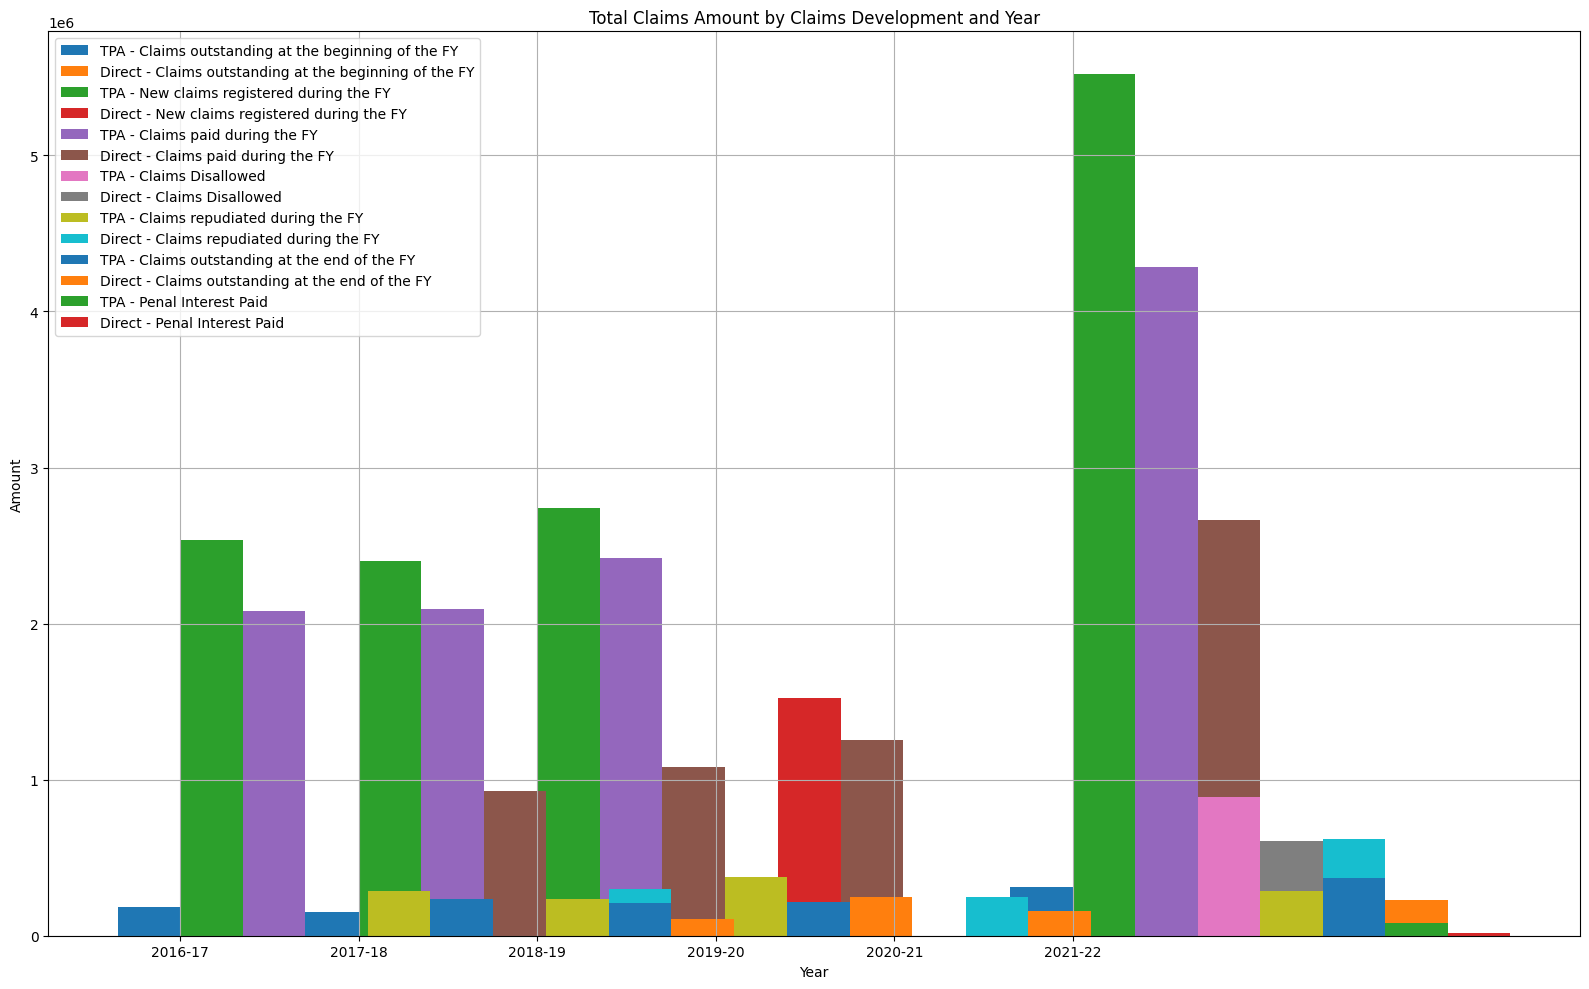

In [133]:

def plot_claims_amount_bar_df1(df):
    ageing_categories = df['Details of Claims Development']
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

    tpa_data = {}
    direct_data = {}

    for ageing in ageing_categories:
        tpa_amounts = [df.loc[df['Details of Claims Development'] == ageing, f'For Claims Handled through TPAs Total Amount ({year})'].values[0] if f'For Claims Handled through TPAs Total Amount ({year})' in df.columns else 0 for year in years]
        direct_amounts = [df.loc[df['Details of Claims Development'] == ageing, f'For Claims handled directly Total amount  ({year})'].values[0] if f'For Claims handled directly Total amount  ({year})' in df.columns else 0 for year in years]

        tpa_data[ageing] = tpa_amounts
        direct_data[ageing] = direct_amounts

    x = np.arange(len(years))
    width = 0.35

    plt.figure(figsize=(16, 10))

    for i, ageing in enumerate(ageing_categories):
        pos = x + i * width

        plt.bar(pos - width/2, tpa_data[ageing], width, label=f'TPA - {ageing}')
        plt.bar(pos + width/2, direct_data[ageing], width, label=f'Direct - {ageing}')

    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title('Total Claims Amount by Claims Development and Year')
    plt.xticks(x, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_claims_amount_bar_df1(df1)


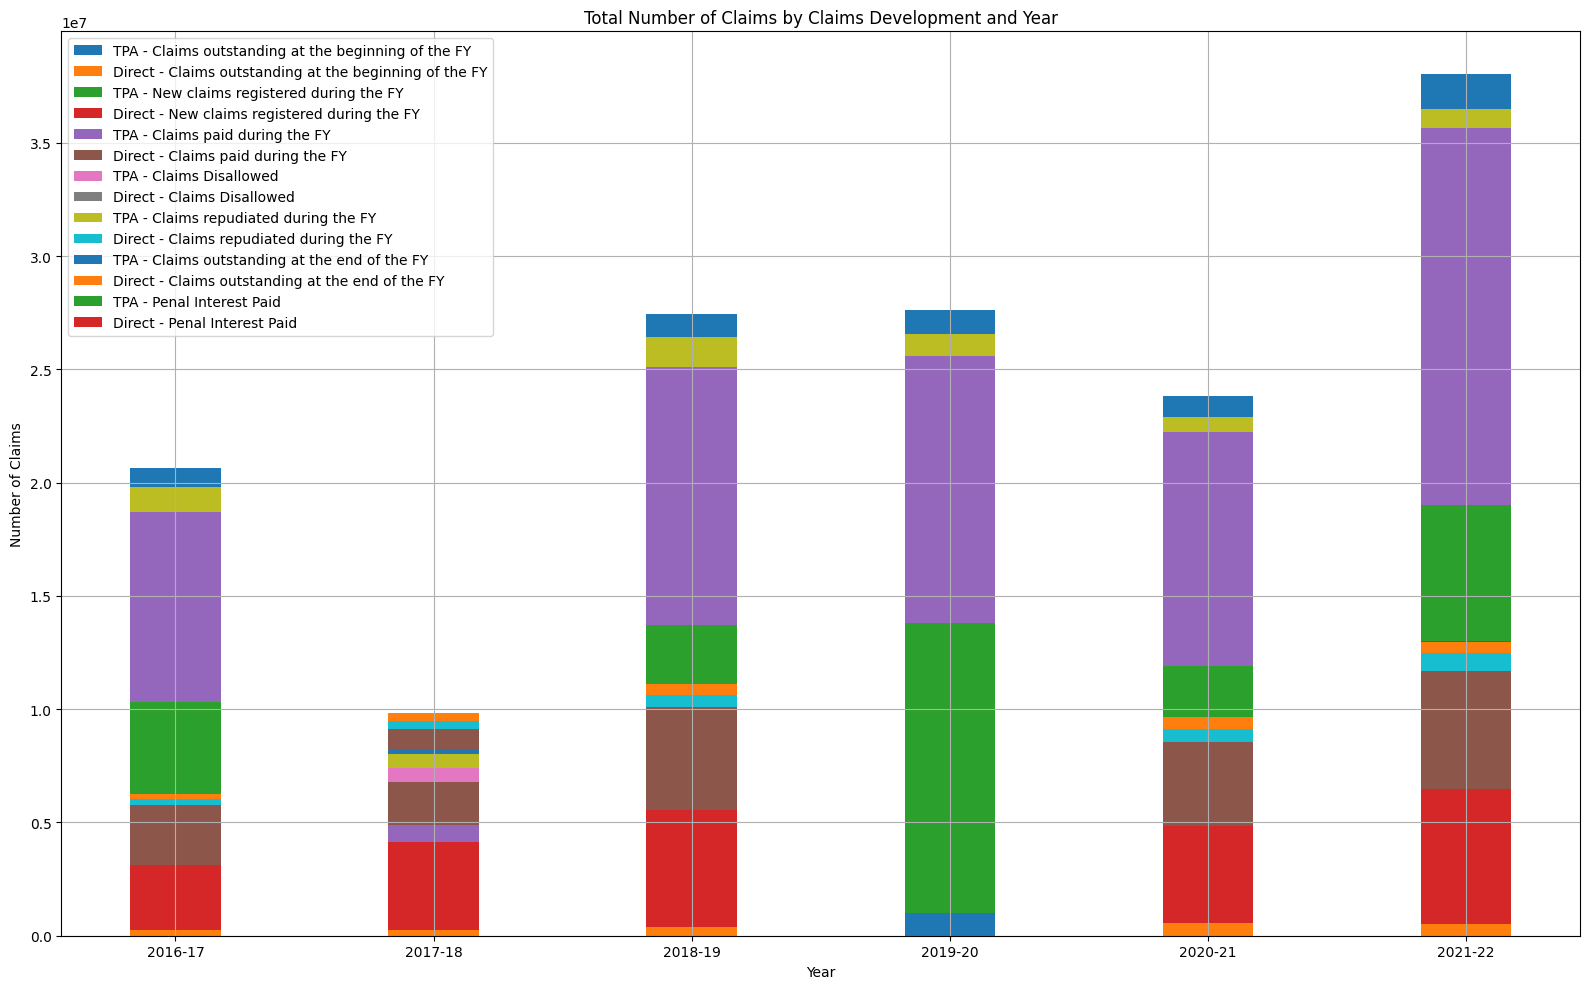

In [134]:

def plot_claims_number_stacked_bar_df1(df):
    ageing_categories = df['Details of Claims Development']
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

    tpa_data = {}
    direct_data = {}

    for ageing in ageing_categories:
        tpa_numbers = [df.loc[df['Details of Claims Development'] == ageing, f'For Claims Handled through TPAs Total Number ({year})'].values[0] if f'For Claims Handled through TPAs Total Number ({year})' in df.columns else 0 for year in years]
        direct_numbers = [df.loc[df['Details of Claims Development'] == ageing, f'For Claims handled directly Total number ({year})'].values[0] if f'For Claims handled directly Total number ({year})' in df.columns else 0 for year in years]

        tpa_data[ageing] = tpa_numbers
        direct_data[ageing] = direct_numbers

    x = np.arange(len(years))
    width = 0.35

    plt.figure(figsize=(16, 10))

    for i, ageing in enumerate(ageing_categories):
        tpa_numbers = tpa_data[ageing]
        direct_numbers = direct_data[ageing]

        pos = x

        plt.bar(pos, tpa_numbers, width, label=f'TPA - {ageing}', bottom=np.sum([tpa_data[a] for a in ageing_categories[:i]], axis=0))
        plt.bar(pos, direct_numbers, width, label=f'Direct - {ageing}', bottom=np.sum([direct_data[a] for a in ageing_categories[:i]], axis=0))

    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Total Number of Claims by Claims Development and Year')
    plt.xticks(x, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_claims_number_stacked_bar_df1(df1)


In [135]:
df2=pd.read_csv("/content/claims develepment - Sheet2.csv")
df2

Ageing of Paid claims*  \
0       Claims Paid within 1 month   
1   Claims Paid between 1-3 months   
2   Claims Paid between 3-6 months   
3  Claims Paid between 6-12 months   
4    Claims Paid between 1-2 years   
5       claims Paid beyond 2 years   

   For Claims Handled through TPAs Total Number (2016-17)  \
0                                            6826461        
1                                            1142672        
2                                             354666        
3                                              76029        
4                                               7192        
5                                               1115        

   For Claims Handled through TPAs Total Amount (2016-17)  \
0                                            1514788        
1                                             383531        
2                                             131014        
3                                              27556        
4                                              17310        
5                                               3427        

   For Claims handled directly Total number (2016-17)  \
0                                            2443360    
1                                             124872    
2                                              25693    
3                                              35973    
4                                                759    
5                                                278    

   For Claims handled directly Total amount (2016-17)  \
0                                             598011    
1                                              61477    
2                                              10122    
3                                               3509    
4                                               1101    
5                                                525    

   For Claims Handled through TPAs Total Number (2017-18)  \
0                                            6379522        
1                                            3342567        
2                                             467940        
3                                             111342        
4                                              26309        
5                                               4903        

   For Claims Handled through TPAs Total Amount (2017-18)  \
0                                            1159001        
1                                             747327        
2                                             136397        
3                                              41257        
4                                               8813        
5                                               3215        

   For Claims handled directly Total number (2017-18)  \
0                                            3693463    
1                                             420924    
2                                              71815    
3                                              17028    
4                                               8033    
5                                                890    

   For Claims handled directly Total amount  (2017-18)  \
0                                             702551     
1                                             147701     
2                                              40509     
3                                              27297     
4                                               9772     
5                                                562     

   For Claims Handled through TPAs Total Number (2018-19)  ...  \
0                                            8439528       ...   
1                                            2209570       ...   
2                                             621845       ...   
3                                              95629       ...   
4                                              18791       ...   
5                             

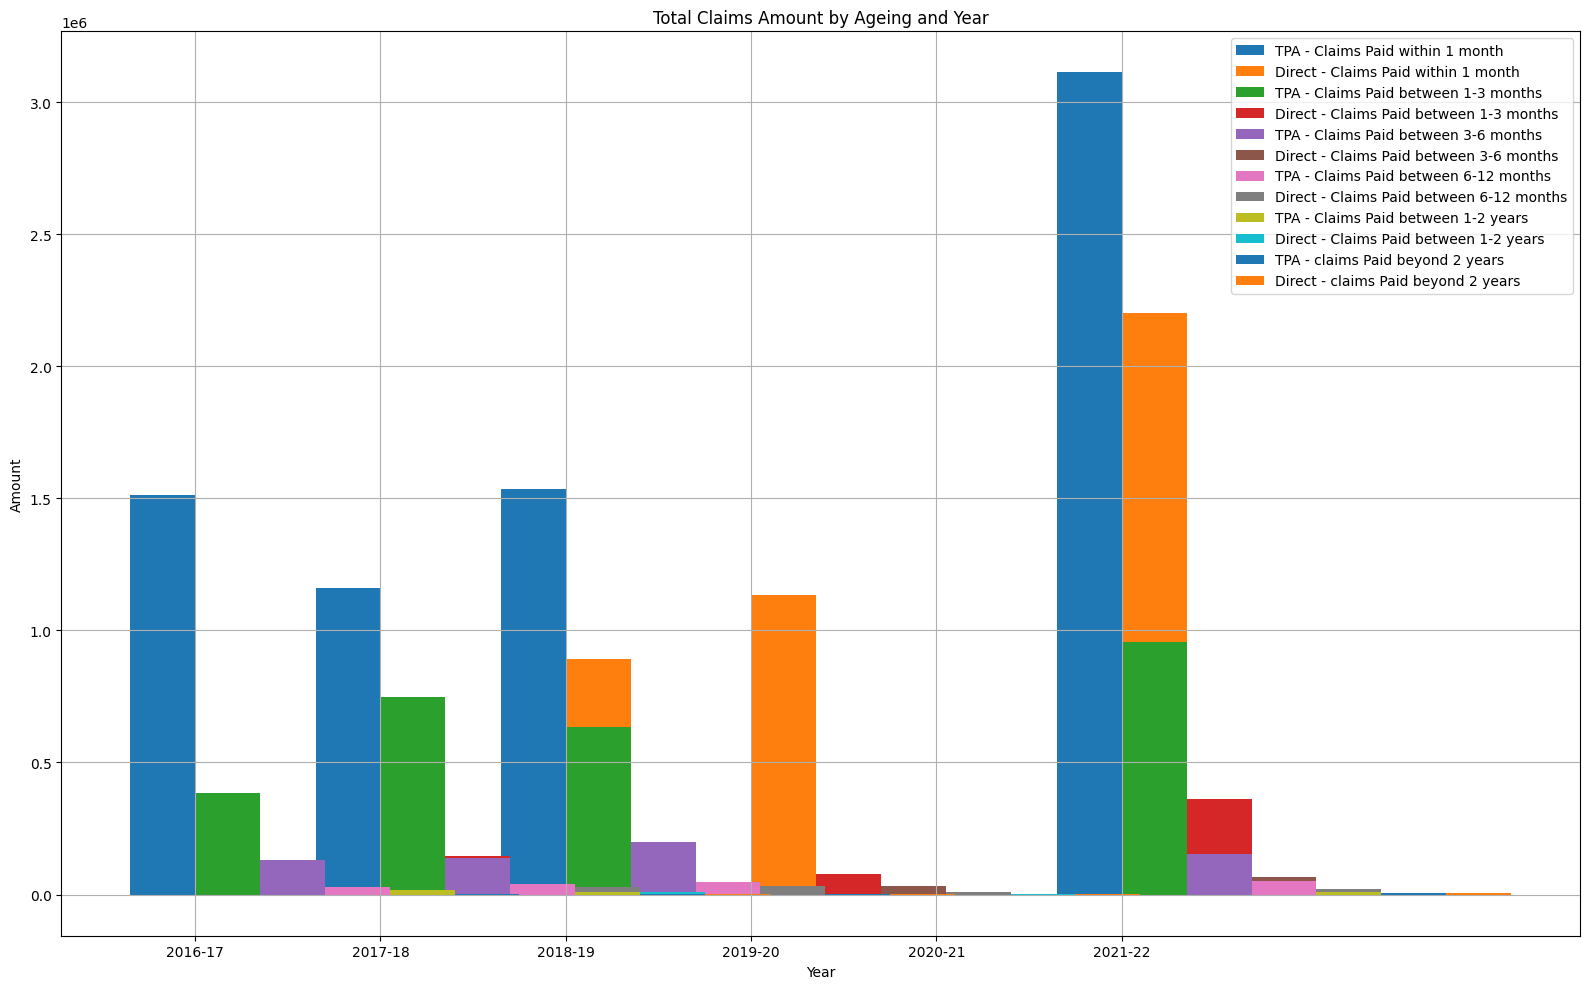

In [136]:

def plot_claims_amount_bar(df):
    ageing_categories = df['Ageing of Paid claims*']
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

    tpa_data = {}
    direct_data = {}

    # Collect data for each ageing category
    for ageing in ageing_categories:
        tpa_amounts = [df.loc[df['Ageing of Paid claims*'] == ageing, f'For Claims Handled through TPAs Total Amount ({year})'].values[0] if f'For Claims Handled through TPAs Total Amount ({year})' in df.columns else 0 for year in years]
        direct_amounts = [df.loc[df['Ageing of Paid claims*'] == ageing, f'For Claims handled directly Total amount  ({year})'].values[0] if f'For Claims handled directly Total amount  ({year})' in df.columns else 0 for year in years]

        tpa_data[ageing] = tpa_amounts
        direct_data[ageing] = direct_amounts

    x = np.arange(len(years))  # Positions for the bars
    width = 0.35  # Width of the bars

    plt.figure(figsize=(16, 10))

    for i, ageing in enumerate(ageing_categories):
        # Adjust bar positions for each ageing category
        pos = x + i * width

        plt.bar(pos - width/2, tpa_data[ageing], width, label=f'TPA - {ageing}')
        plt.bar(pos + width/2, direct_data[ageing], width, label=f'Direct - {ageing}')

    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title('Total Claims Amount by Ageing and Year')
    plt.xticks(x, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_claims_amount_bar(df2)


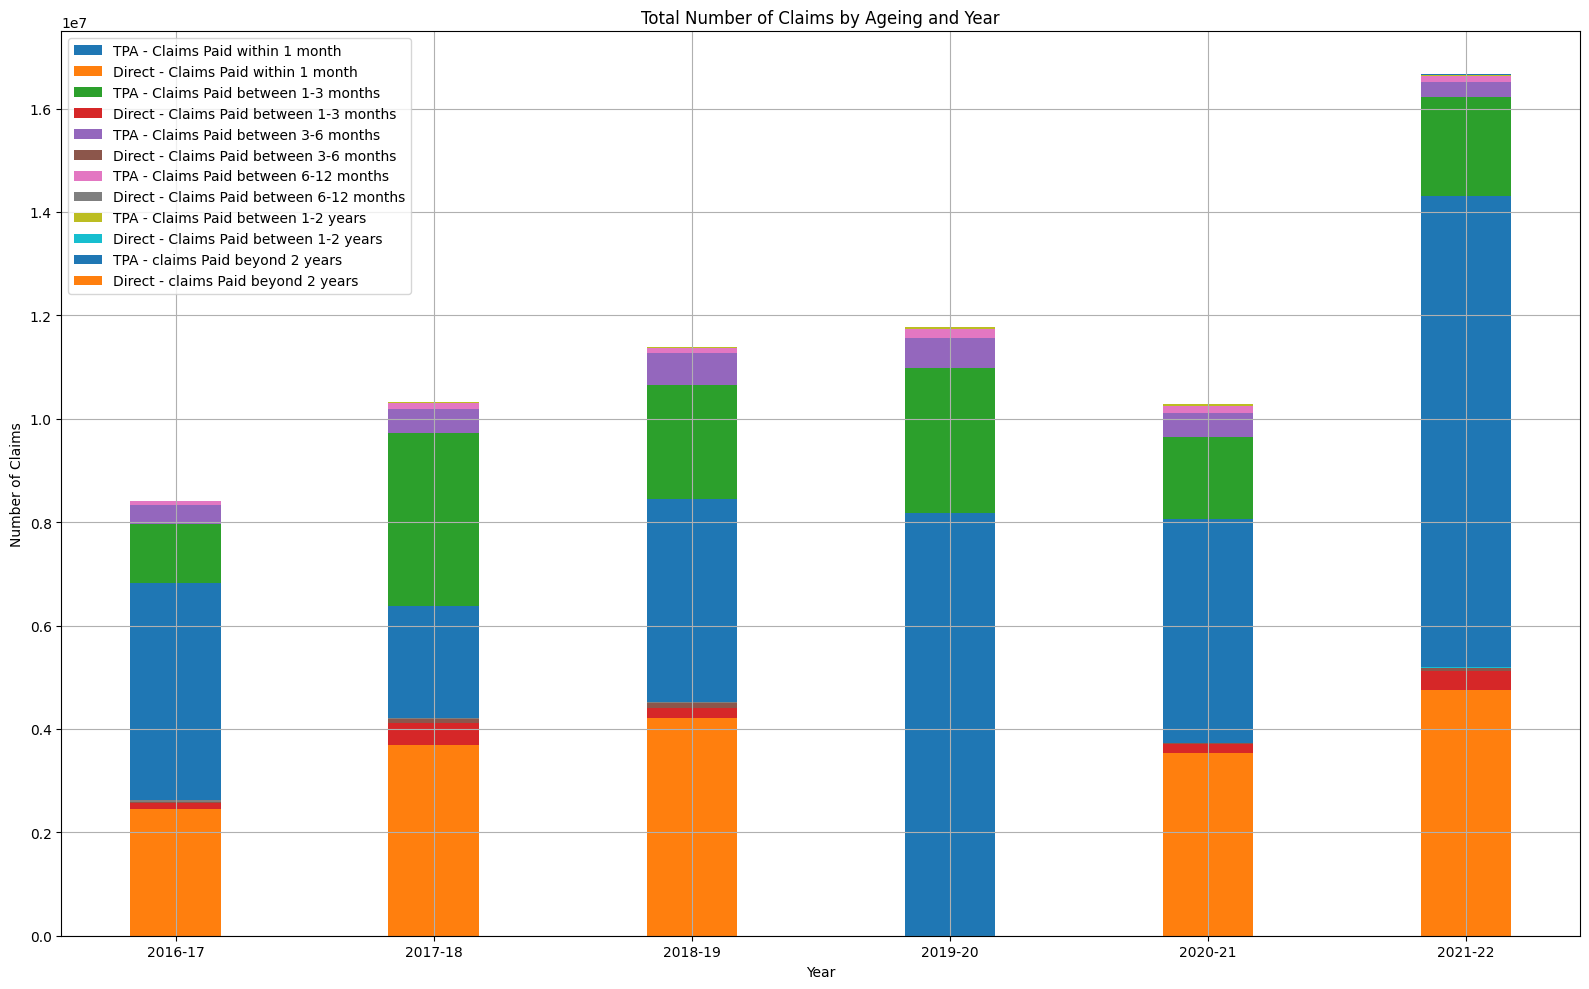

In [137]:

def plot_claims_number_stacked_bar(df):
    ageing_categories = df['Ageing of Paid claims*']
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

    tpa_data = {}
    direct_data = {}

    # Collect data for each ageing category
    for ageing in ageing_categories:
        tpa_numbers = [df.loc[df['Ageing of Paid claims*'] == ageing, f'For Claims Handled through TPAs Total Number ({year})'].values[0] if f'For Claims Handled through TPAs Total Number ({year})' in df.columns else 0 for year in years]
        direct_numbers = [df.loc[df['Ageing of Paid claims*'] == ageing, f'For Claims handled directly Total number ({year})'].values[0] if f'For Claims handled directly Total number ({year})' in df.columns else 0 for year in years]

        tpa_data[ageing] = tpa_numbers
        direct_data[ageing] = direct_numbers

    x = np.arange(len(years))  # Positions for the bars
    width = 0.35  # Width of the bars

    plt.figure(figsize=(16, 10))

    for i, ageing in enumerate(ageing_categories):
        tpa_numbers = tpa_data[ageing]
        direct_numbers = direct_data[ageing]

        # Adjust bar positions for each ageing category
        pos = x

        plt.bar(pos, tpa_numbers, width, label=f'TPA - {ageing}', bottom=np.sum([tpa_data[a] for a in ageing_categories[:i]], axis=0))
        plt.bar(pos, direct_numbers, width, label=f'Direct - {ageing}', bottom=np.sum([direct_data[a] for a in ageing_categories[:i]], axis=0))

    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Total Number of Claims by Ageing and Year')
    plt.xticks(x, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_claims_number_stacked_bar(df2)


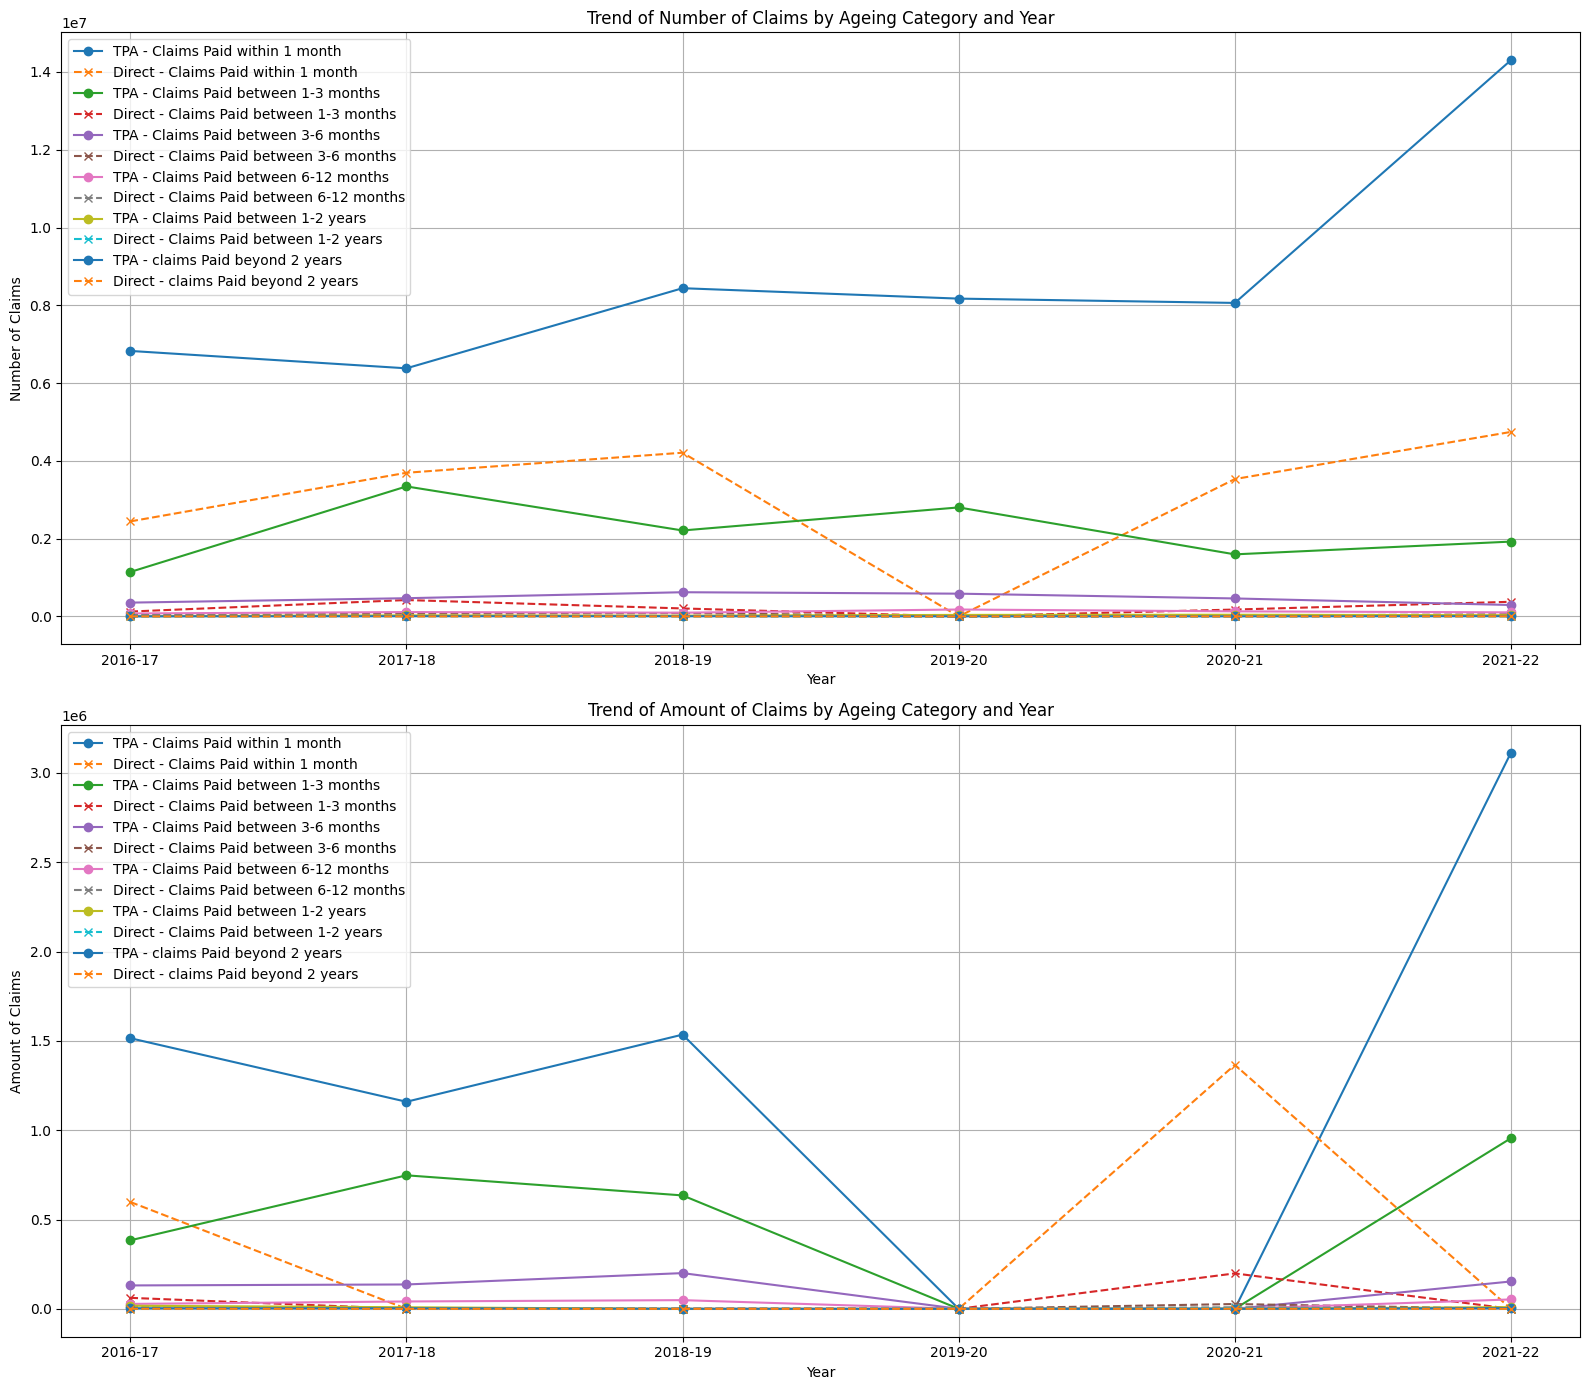

In [138]:

def plot_trend_analysis(df):
    ageing_categories = df['Ageing of Paid claims*']
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

    # Create empty dictionaries to hold data for trends
    tpa_number_trends = {ageing: [] for ageing in ageing_categories}
    direct_number_trends = {ageing: [] for ageing in ageing_categories}

    tpa_amount_trends = {ageing: [] for ageing in ageing_categories}
    direct_amount_trends = {ageing: [] for ageing in ageing_categories}

    for ageing in ageing_categories:
        # Collect data for each ageing category
        tpa_numbers = [df.loc[df['Ageing of Paid claims*'] == ageing, f'For Claims Handled through TPAs Total Number ({year})'].values[0] if f'For Claims Handled through TPAs Total Number ({year})' in df.columns else 0 for year in years]
        direct_numbers = [df.loc[df['Ageing of Paid claims*'] == ageing, f'For Claims handled directly Total number ({year})'].values[0] if f'For Claims handled directly Total number ({year})' in df.columns else 0 for year in years]

        tpa_amounts = [df.loc[df['Ageing of Paid claims*'] == ageing, f'For Claims Handled through TPAs Total Amount ({year})'].values[0] if f'For Claims Handled through TPAs Total Amount ({year})' in df.columns else 0 for year in years]
        direct_amounts = [df.loc[df['Ageing of Paid claims*'] == ageing, f'For Claims handled directly Total amount ({year})'].values[0] if f'For Claims handled directly Total amount ({year})' in df.columns else 0 for year in years]

        tpa_number_trends[ageing] = tpa_numbers
        direct_number_trends[ageing] = direct_numbers

        tpa_amount_trends[ageing] = tpa_amounts
        direct_amount_trends[ageing] = direct_amounts

    plt.figure(figsize=(16, 14))

    # Plot number of claims trends
    plt.subplot(2, 1, 1)
    for ageing in ageing_categories:
        plt.plot(years, tpa_number_trends[ageing], marker='o', label=f'TPA - {ageing}')
        plt.plot(years, direct_number_trends[ageing], marker='x', linestyle='--', label=f'Direct - {ageing}')

    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Trend of Number of Claims by Ageing Category and Year')
    plt.legend()
    plt.grid(True)

    # Plot amount of claims trends
    plt.subplot(2, 1, 2)
    for ageing in ageing_categories:
        plt.plot(years, tpa_amount_trends[ageing], marker='o', label=f'TPA - {ageing}')
        plt.plot(years, direct_amount_trends[ageing], marker='x', linestyle='--', label=f'Direct - {ageing}')

    plt.xlabel('Year')
    plt.ylabel('Amount of Claims')
    plt.title('Trend of Amount of Claims by Ageing Category and Year')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_trend_analysis(df2)


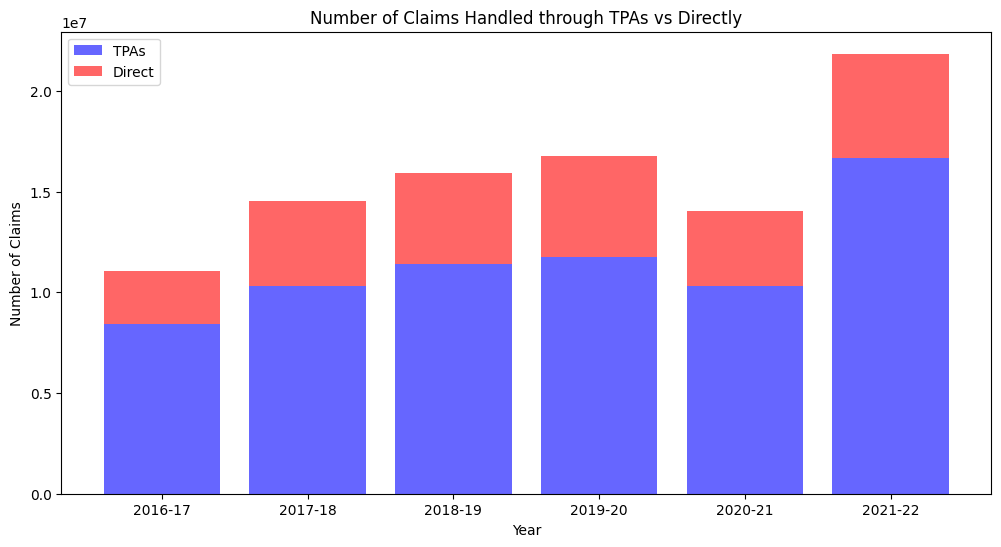

In [139]:
def plot_claims_number_stacked_bar(df2):
    # Extract relevant columns
    tpa_cols = [col for col in df2.columns if 'Total Number' in col and 'TPAs' in col]
    direct_cols = [col for col in df2.columns if 'Total number' in col and 'directly' in col]

    # Data for plotting
    tpa_data = df2[tpa_cols].sum()
    direct_data = df2[direct_cols].sum()

    years = [col.split(' ')[-1].strip('()') for col in tpa_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(years, tpa_data, label='TPAs', color='b', alpha=0.6)
    plt.bar(years, direct_data, bottom=tpa_data, label='Direct', color='r', alpha=0.6)
    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Number of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_claims_number_stacked_bar(df2)


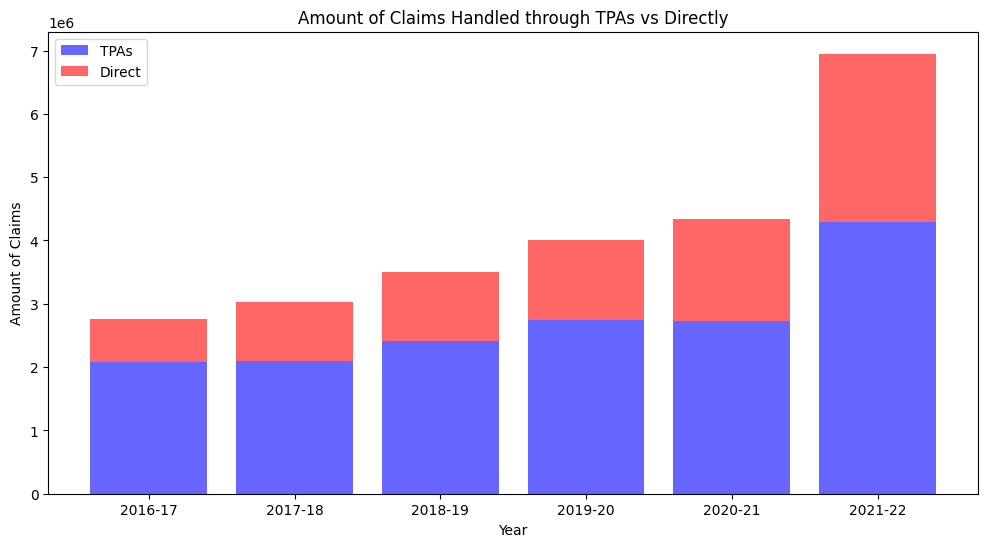

In [140]:
def plot_claims_amount_stacked_bar(df2):
    # Extract relevant columns
    tpa_cols = [col for col in df2.columns if 'Total Amount' in col and 'TPAs' in col]
    direct_cols = [col for col in df2.columns if 'Total amount' in col and 'directly' in col]

    # Data for plotting
    tpa_data = df2[tpa_cols].sum()
    direct_data = df2[direct_cols].sum()

    years = [col.split(' ')[-1].strip('()') for col in tpa_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(years, tpa_data, label='TPAs', color='b', alpha=0.6)
    plt.bar(years, direct_data, bottom=tpa_data, label='Direct', color='r', alpha=0.6)
    plt.xlabel('Year')
    plt.ylabel('Amount of Claims')
    plt.title('Amount of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_claims_amount_stacked_bar(df2)


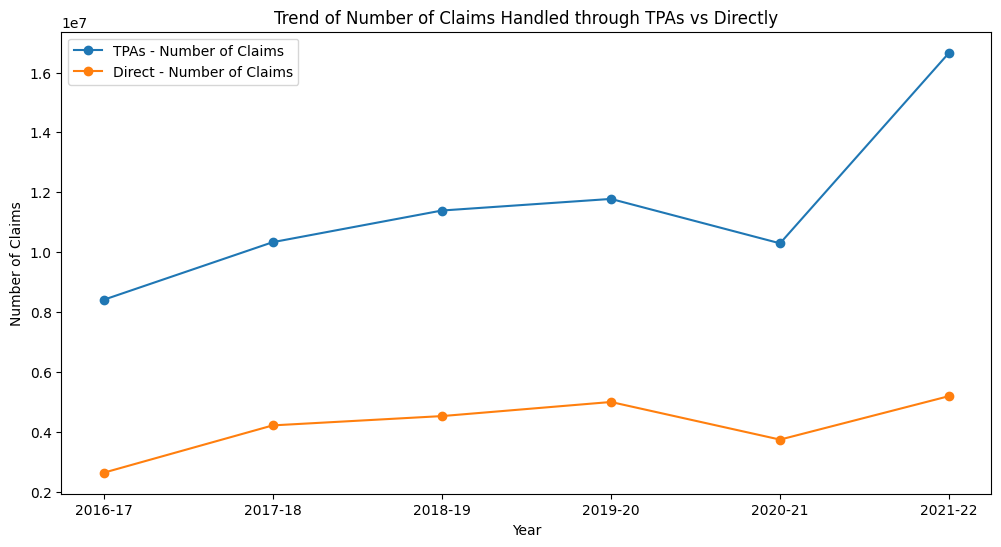

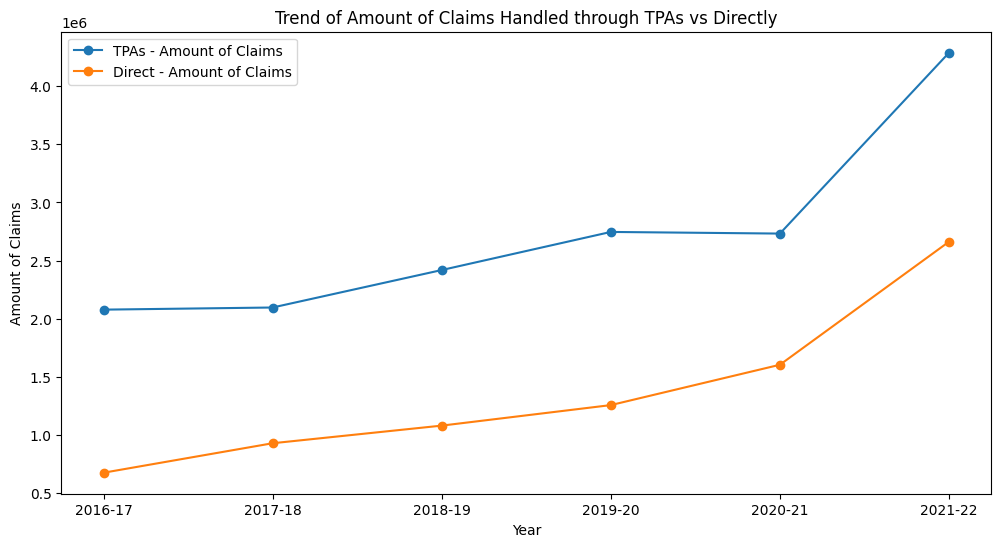

In [141]:
def plot_aggregated_trends(df2):
    # Extract relevant columns
    tpa_number_cols = [col for col in df2.columns if 'Total Number' in col and 'TPAs' in col]
    direct_number_cols = [col for col in df2.columns if 'Total number' in col and 'directly' in col]
    tpa_amount_cols = [col for col in df2.columns if 'Total Amount' in col and 'TPAs' in col]
    direct_amount_cols = [col for col in df2.columns if 'Total amount' in col and 'directly' in col]

    # Data for plotting
    tpa_number_data = df2[tpa_number_cols].sum()
    direct_number_data = df2[direct_number_cols].sum()
    tpa_amount_data = df2[tpa_amount_cols].sum()
    direct_amount_data = df2[direct_amount_cols].sum()

    years = [col.split(' ')[-1].strip('()') for col in tpa_number_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(years, tpa_number_data, label='TPAs - Number of Claims', marker='o')
    plt.plot(years, direct_number_data, label='Direct - Number of Claims', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Trend of Number of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(years, tpa_amount_data, label='TPAs - Amount of Claims', marker='o')
    plt.plot(years, direct_amount_data, label='Direct - Amount of Claims', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Amount of Claims')
    plt.title('Trend of Amount of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_aggregated_trends(df2)


In [142]:
df3=pd.read_csv("/content/claims develepment - Sheet3.csv")
df3

Ageing of repudiated claims**  \
0       Claims repudiated within 1 month   
1   Claims repudiated between 1-3 months   
2   Claims repudiated between 3-6 months   
3  Claims repudiated between 6-12 months   
4    Claims repudiated between 1-2 years   
5       claims repudiated beyond 2 years   

   For Claims Handled through TPAs Total Number (2016-17)  \
0                                             698453        
1                                             235132        
2                                             125047        
3                                              26580        
4                                               4791        
5                                               1218        

   For Claims Handled through TPAs Total Amount (2016-17)  \
0                                             197118        
1                                              57723        
2                                              23826        
3                                               5596        
4                                               1160        
5                                                355        

   For Claims handled directly Total number (2016-17)  \
0                                             214159    
1                                              51129    
2                                               7145    
3                                               2787    
4                                                261    
5                                                281    

   For Claims handled directly Total amount (2016-17)  \
0                                             110466    
1                                              17682    
2                                               3304    
3                                               1287    
4                                                126    
5                                                269    

   For Claims Handled through TPAs Total Number (2017-18)  \
0                                             366359        
1                                             247791        
2                                             120159        
3                                             112367        
4                                              24997        
5                                               3476        

   For Claims Handled through TPAs Total Amount (2017-18)  \
0                                             112316        
1                                              50996        
2                                              35293        
3                                              25290        
4                                              10148        
5                                               2196        

   For Claims handled directly Total number (2017-18)  \
0                                             252339    
1                                              64956    
2                                              11792    
3                                               5956    
4                                               3404    
5                                               1020    

   For Claims handled directly Total amount  (2017-18)  \
0                                             116662     
1                                              63051     
2                                              46015     
3                                              69505     
4                                               2054     
5                                               3167     

   For Claims Handled through TPAs Total Number (2018-19)  ...  \
0                                             933296       ...   
1                                             218525       ...   
2                                             114098       ...   
3                                              38127       ...   
4                                              17343 

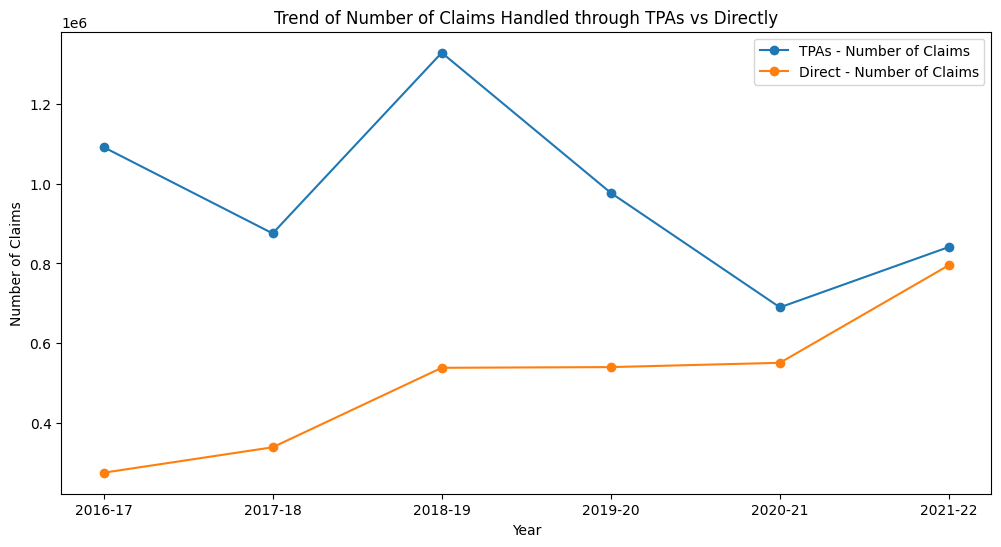

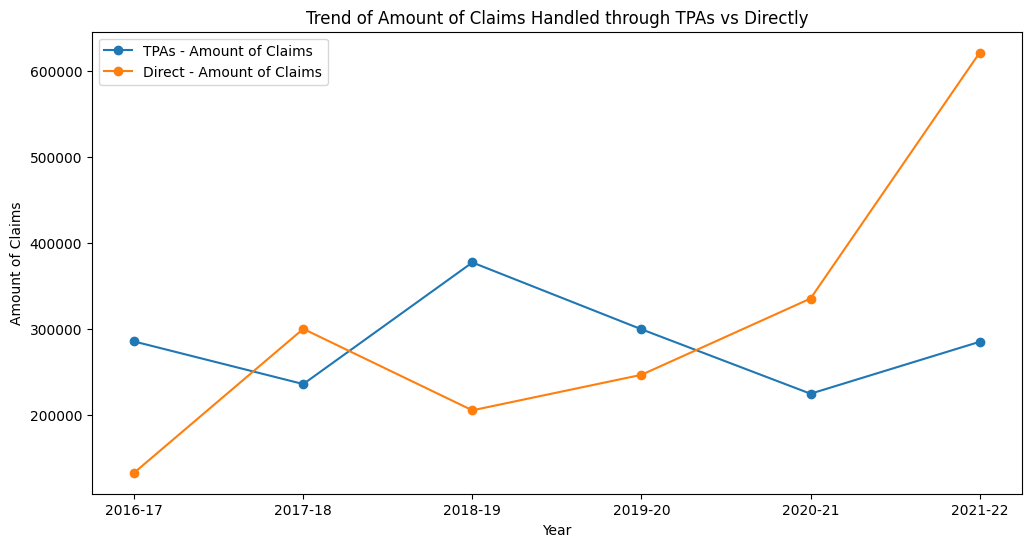

In [96]:
def plot_aggregated_trends(df3):
    # Extract relevant columns
    tpa_number_cols = [col for col in df3.columns if 'Total Number' in col and 'TPAs' in col]
    direct_number_cols = [col for col in df3.columns if 'Total number' in col and 'directly' in col]
    tpa_amount_cols = [col for col in df3.columns if 'Total Amount' in col and 'TPAs' in col]
    direct_amount_cols = [col for col in df3.columns if 'Total amount' in col and 'directly' in col]

    # Data for plotting
    tpa_number_data = df3[tpa_number_cols].sum()
    direct_number_data = df3[direct_number_cols].sum()
    tpa_amount_data = df3[tpa_amount_cols].sum()
    direct_amount_data = df3[direct_amount_cols].sum()

    years = [col.split('(')[-1].strip(')') for col in tpa_number_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(years, tpa_number_data, label='TPAs - Number of Claims', marker='o')
    plt.plot(years, direct_number_data, label='Direct - Number of Claims', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Trend of Number of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(years, tpa_amount_data, label='TPAs - Amount of Claims', marker='o')
    plt.plot(years, direct_amount_data, label='Direct - Amount of Claims', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Amount of Claims')
    plt.title('Trend of Amount of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_aggregated_trends(df3)


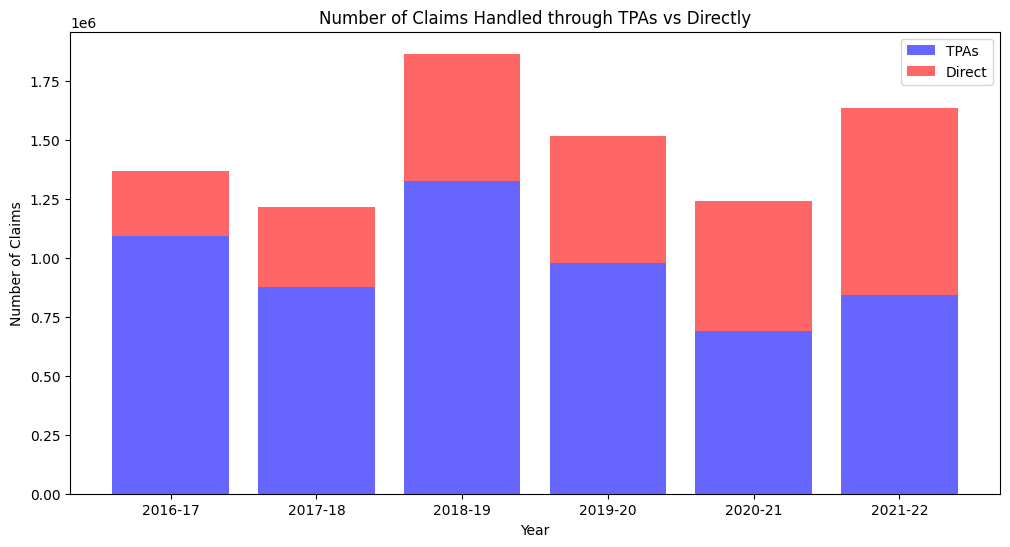

In [143]:
def plot_claims_number_stacked_bar(df3):
    # Extract relevant columns
    tpa_cols = [col for col in df3.columns if 'Total Number' in col and 'TPAs' in col]
    direct_cols = [col for col in df3.columns if 'Total number' in col and 'directly' in col]

    # Data for plotting
    tpa_data = df3[tpa_cols].sum()
    direct_data = df3[direct_cols].sum()

    years = [col.split('(')[-1].strip(')') for col in tpa_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(years, tpa_data, label='TPAs', color='b', alpha=0.6)
    plt.bar(years, direct_data, bottom=tpa_data, label='Direct', color='r', alpha=0.6)
    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Number of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_claims_number_stacked_bar(df3)


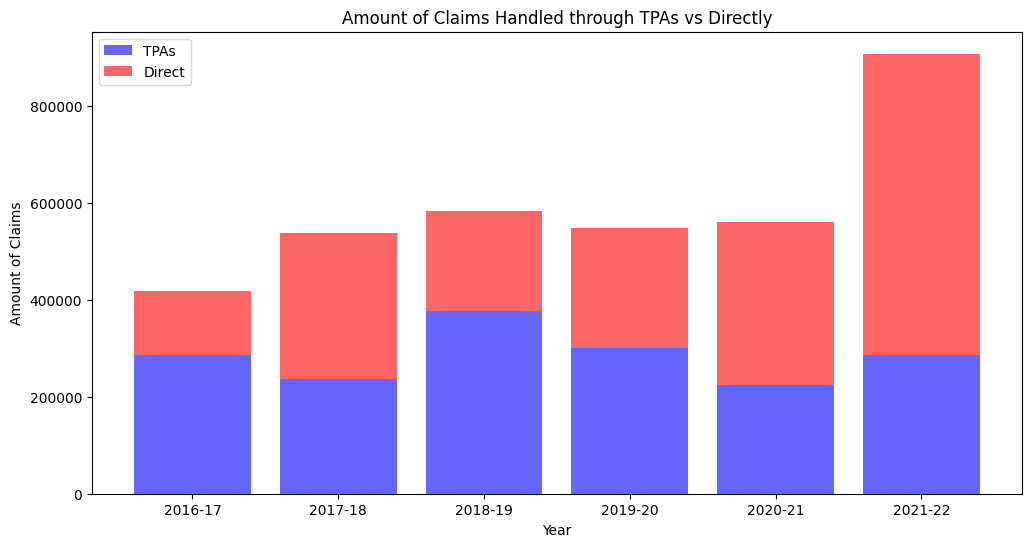

In [144]:
def plot_claims_amount_stacked_bar(df3):
    # Extract relevant columns
    tpa_cols = [col for col in df3.columns if 'Total Amount' in col and 'TPAs' in col]
    direct_cols = [col for col in df3.columns if 'Total amount' in col and 'directly' in col]

    # Data for plotting
    tpa_data = df3[tpa_cols].sum()
    direct_data = df3[direct_cols].sum()

    years = [col.split('(')[-1].strip(')') for col in tpa_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(years, tpa_data, label='TPAs', color='b', alpha=0.6)
    plt.bar(years, direct_data, bottom=tpa_data, label='Direct', color='r', alpha=0.6)
    plt.xlabel('Year')
    plt.ylabel('Amount of Claims')
    plt.title('Amount of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_claims_amount_stacked_bar(df3)


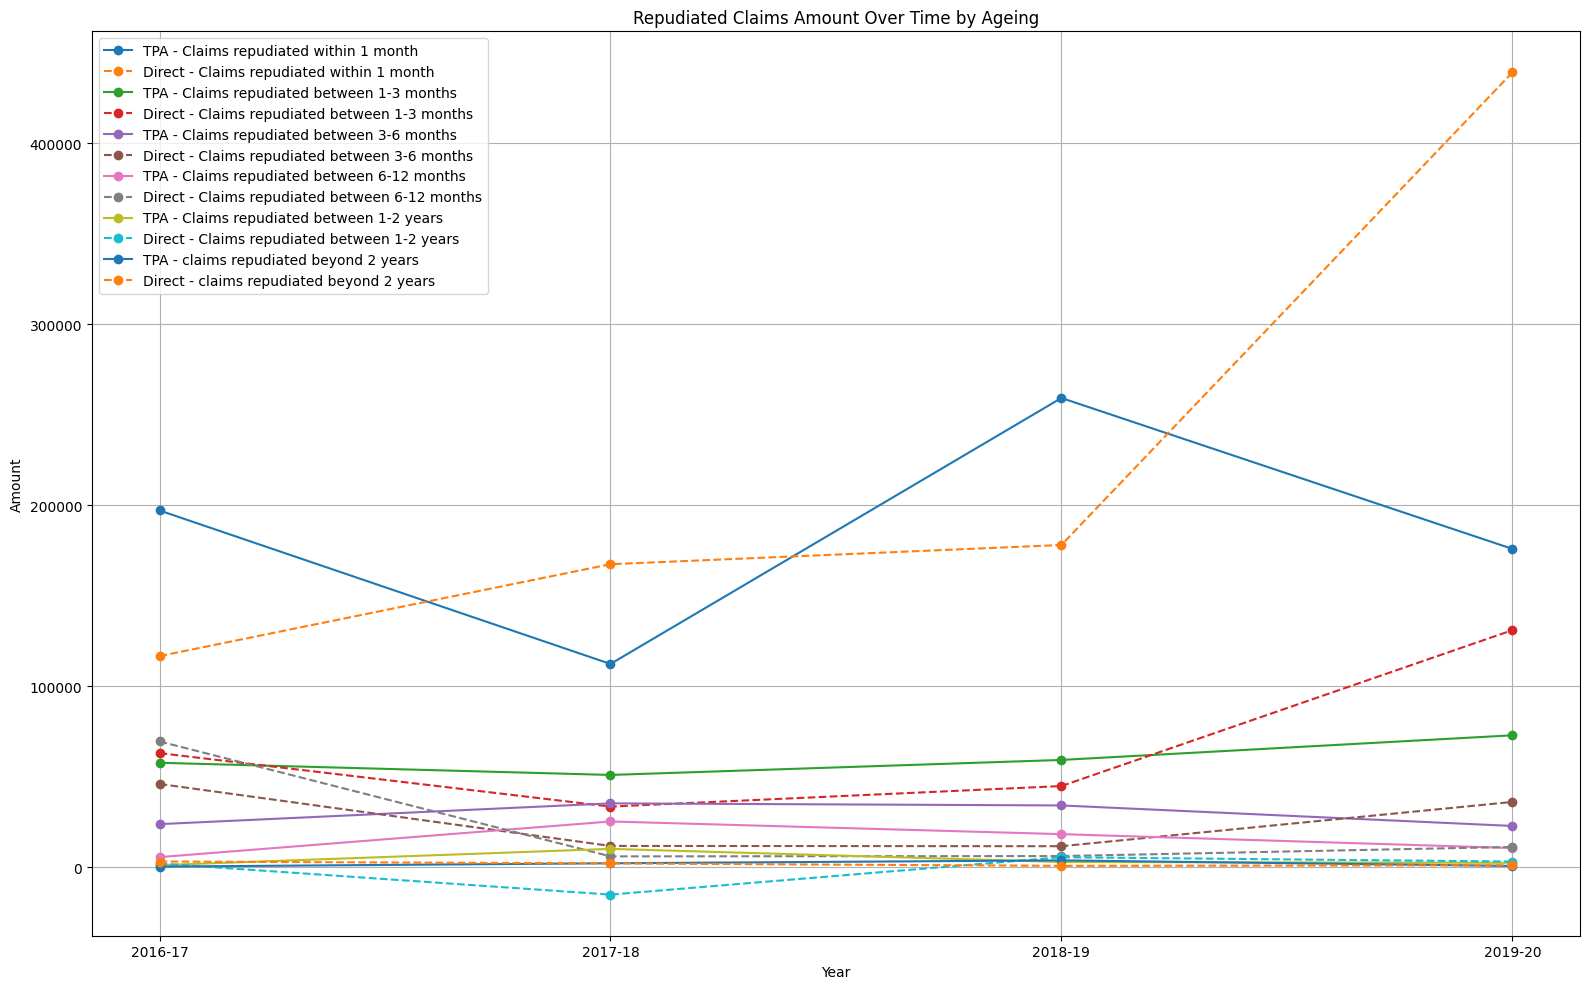

In [145]:

def plot_claims_amount_line_df3(df):
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
    rows_to_plot = ['Claims repudiated within 1 month', 'Claims repudiated between 1-3 months',
                    'Claims repudiated between 3-6 months', 'Claims repudiated between 6-12 months',
                    'Claims repudiated between 1-2 years', 'claims repudiated beyond 2 years']

    plt.figure(figsize=(16, 10))
    for ageing in rows_to_plot:
        tpa_columns = [f'For Claims Handled through TPAs Total Amount ({year})' for year in years]
        direct_columns = [f'For Claims handled directly Total amount  ({year})' for year in years]

        tpa_amounts = [df.loc[df['Ageing of repudiated claims**'] == ageing, col].values[0] for col in tpa_columns if col in df.columns]
        direct_amounts = [df.loc[df['Ageing of repudiated claims**'] == ageing, col].values[0] for col in direct_columns if col in df.columns]

        plt.plot(years[:len(tpa_amounts)], tpa_amounts, marker='o', linestyle='-', label=f'TPA - {ageing}')
        plt.plot(years[:len(direct_amounts)], direct_amounts, marker='o', linestyle='--', label=f'Direct - {ageing}')

    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title('Repudiated Claims Amount Over Time by Ageing')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_claims_amount_line_df3(df3)


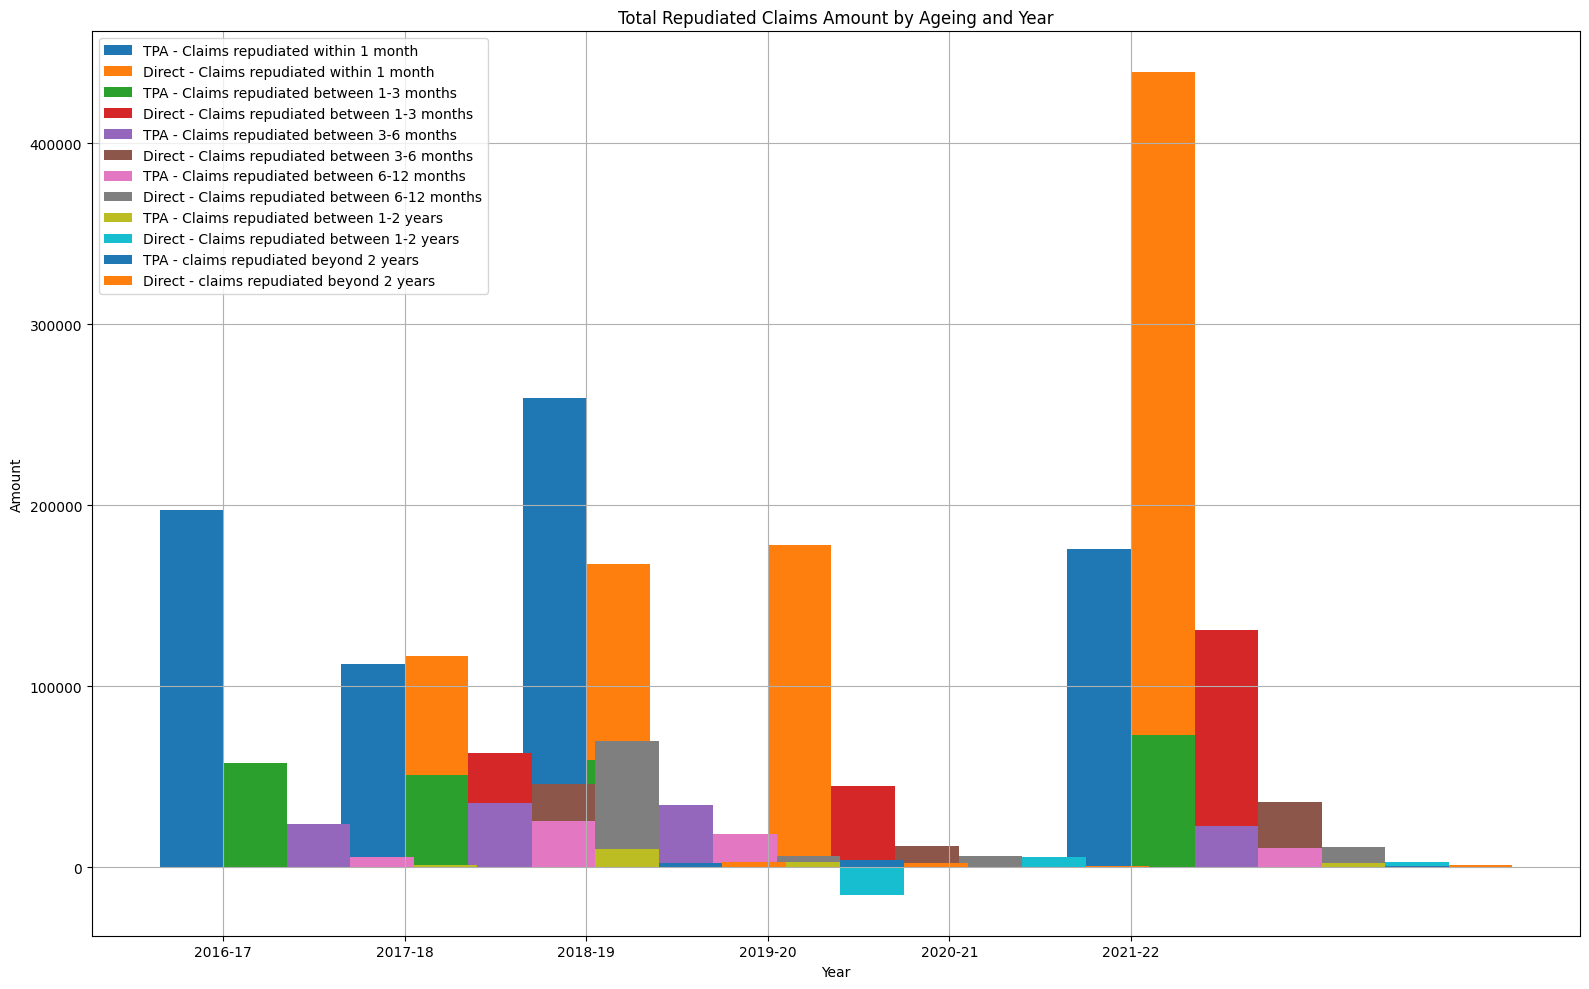

In [146]:

def plot_claims_amount_bar_df3(df):
    ageing_categories = df['Ageing of repudiated claims**']
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

    tpa_data = {}
    direct_data = {}

    for ageing in ageing_categories:
        tpa_amounts = [df.loc[df['Ageing of repudiated claims**'] == ageing, f'For Claims Handled through TPAs Total Amount ({year})'].values[0] if f'For Claims Handled through TPAs Total Amount ({year})' in df.columns else 0 for year in years]
        direct_amounts = [df.loc[df['Ageing of repudiated claims**'] == ageing, f'For Claims handled directly Total amount  ({year})'].values[0] if f'For Claims handled directly Total amount  ({year})' in df.columns else 0 for year in years]

        tpa_data[ageing] = tpa_amounts
        direct_data[ageing] = direct_amounts

    x = np.arange(len(years))
    width = 0.35

    plt.figure(figsize=(16, 10))

    for i, ageing in enumerate(ageing_categories):
        pos = x + i * width

        plt.bar(pos - width/2, tpa_data[ageing], width, label=f'TPA - {ageing}')
        plt.bar(pos + width/2, direct_data[ageing], width, label=f'Direct - {ageing}')

    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title('Total Repudiated Claims Amount by Ageing and Year')
    plt.xticks(x, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_claims_amount_bar_df3(df3)


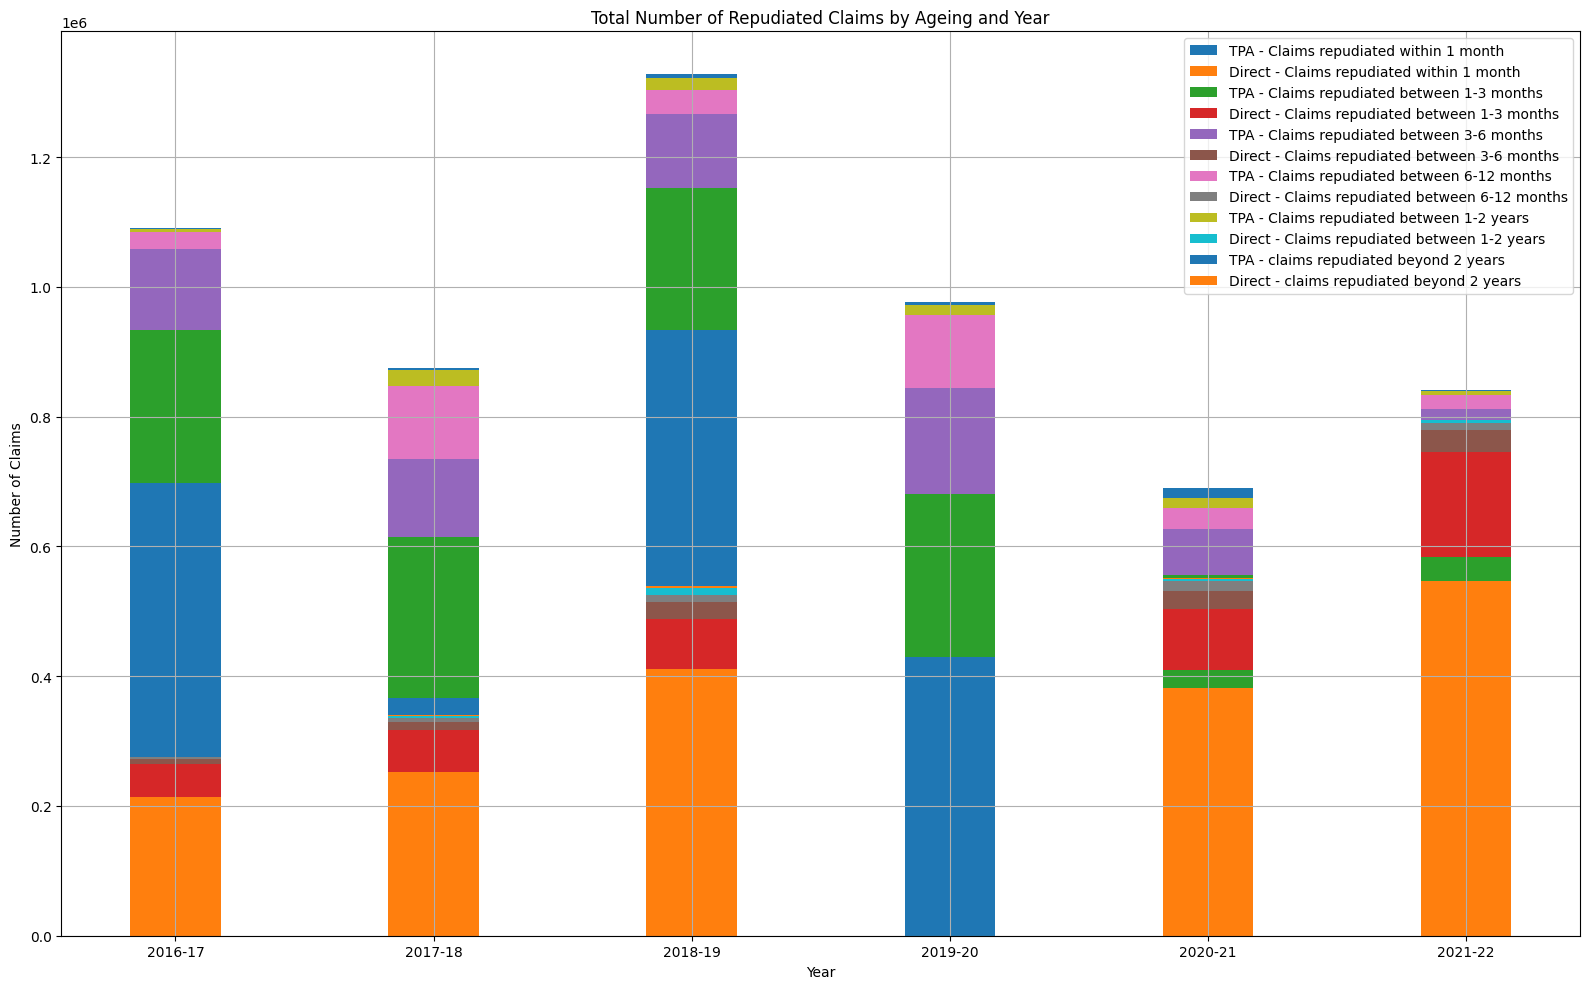

In [147]:

def plot_claims_number_stacked_bar_df3(df):
    ageing_categories = df['Ageing of repudiated claims**']
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

    tpa_data = {}
    direct_data = {}

    for ageing in ageing_categories:
        tpa_numbers = [df.loc[df['Ageing of repudiated claims**'] == ageing, f'For Claims Handled through TPAs Total Number ({year})'].values[0] if f'For Claims Handled through TPAs Total Number ({year})' in df.columns else 0 for year in years]
        direct_numbers = [df.loc[df['Ageing of repudiated claims**'] == ageing, f'For Claims handled directly Total number ({year})'].values[0] if f'For Claims handled directly Total number ({year})' in df.columns else 0 for year in years]

        tpa_data[ageing] = tpa_numbers
        direct_data[ageing] = direct_numbers

    x = np.arange(len(years))
    width = 0.35

    plt.figure(figsize=(16, 10))

    for i, ageing in enumerate(ageing_categories):
        tpa_numbers = tpa_data[ageing]
        direct_numbers = direct_data[ageing]

        pos = x

        plt.bar(pos, tpa_numbers, width, label=f'TPA - {ageing}', bottom=np.sum([tpa_data[a] for a in ageing_categories[:i]], axis=0))
        plt.bar(pos, direct_numbers, width, label=f'Direct - {ageing}', bottom=np.sum([direct_data[a] for a in ageing_categories[:i]], axis=0))

    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Total Number of Repudiated Claims by Ageing and Year')
    plt.xticks(x, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_claims_number_stacked_bar_df3(df3)


In [148]:
df4=pd.read_csv("/content/claims develepment - Sheet4.csv")
df4

Ageing of outstanding claims**  \
0       Claims outstanding within 1 month   
1   Claims outstanding between 1-3 months   
2   Claims outstanding between 3-6 months   
3  Claims outstanding between 6-12 months   
4    Claims outstanding between 1-2 years   
5       claims outstanding beyond 2 years   

   For Claims Handled through TPAs Total Number (2016-17)  \
0                                             592491        
1                                             117129        
2                                              60370        
3                                              35324        
4                                               6894        
5                                               1381        

   For Claims Handled through TPAs Total Amount (2016-17)  \
0                                             181685        
1                                              29647        
2                                              14433        
3                                               6505        
4                                               2242        
5                                                929        

   For Claims handled directly Total number (2016-17)  \
0                                             182106    
1                                              13076    
2                                               5179    
3                                               2634    
4                                               9914    
5                                               7340    

   For Claims handled directly Total amount (2016-17)  \
0                                              56806    
1                                               8093    
2                                               3536    
3                                               2257    
4                                               2888    
5                                               1885    

   For Claims Handled through TPAs Total Number (2017-18)  \
0                                             619359        
1                                             198489        
2                                              83532        
3                                              49044        
4                                              33125        
5                                               3234        

   For Claims Handled through TPAs Total Amount (2017-18)  \
0                                             147729        
1                                              36099        
2                                              11106        
3                                               6173        
4                                               7502        
5                                               2325        

   For Claims handled directly Total number (2017-18)  \
0                                             314077    
1                                              15558    
2                                               5193    
3                                               4944    
4                                               1268    
5                                              16596    

   For Claims handled directly Total amount  (2017-18)  \
0                                              83822     
1                                               9918     
2                                               4286     
3                                               5088     
4                                               1691     
5                                               4745     

   For Claims Handled through TPAs Total Number (2018-19)  ...  \
0                                             764299       ...   
1                                             143885       ...   
2                                              48827       ...   
3                                              16697       ...   
4                                             

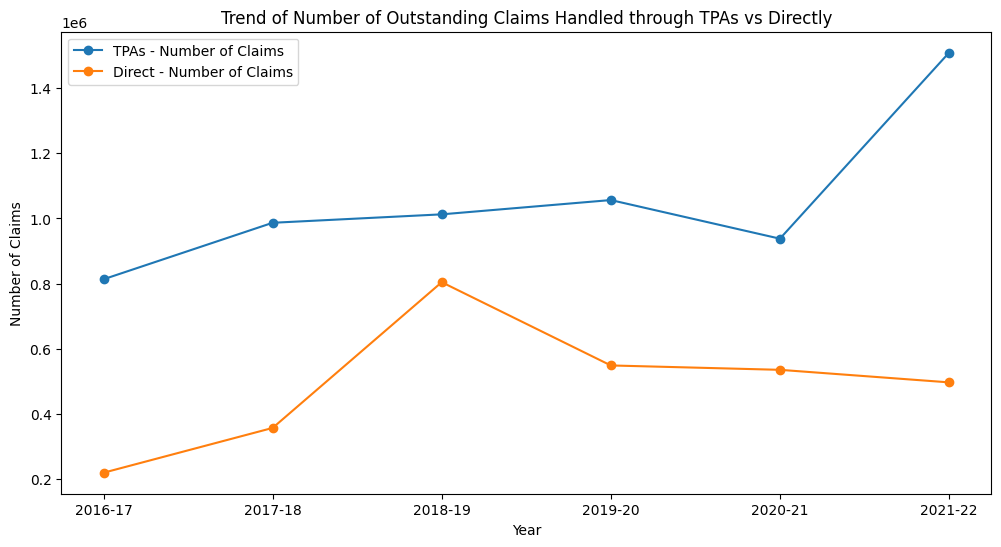

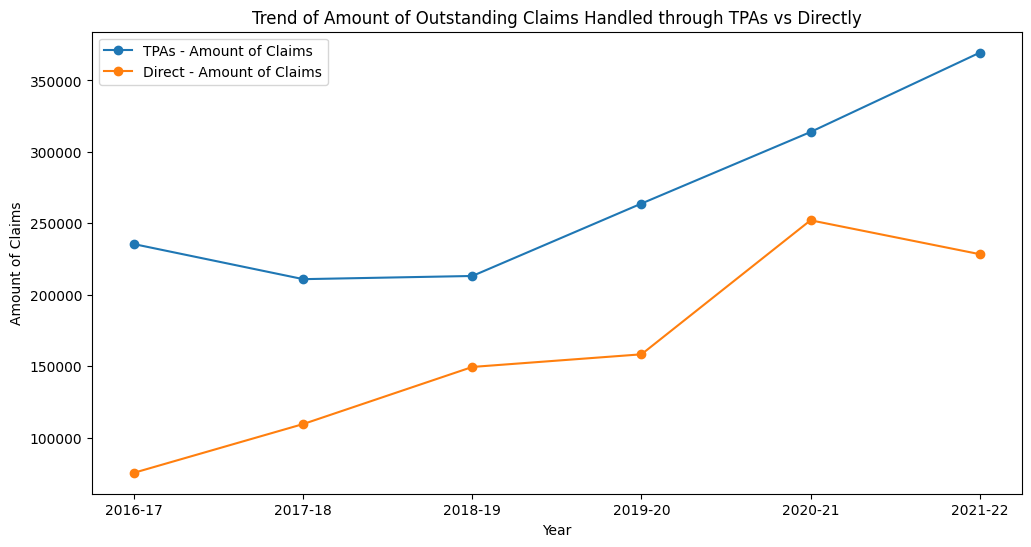

In [149]:

def plot_aggregated_trends(df4):
    # Extract relevant columns
    tpa_number_cols = [col for col in df4.columns if 'Total Number' in col and 'TPAs' in col]
    direct_number_cols = [col for col in df4.columns if 'Total number' in col and 'directly' in col]
    tpa_amount_cols = [col for col in df4.columns if 'Total Amount' in col and 'TPAs' in col]
    direct_amount_cols = [col for col in df4.columns if 'Total amount' in col and 'directly' in col]

    # Data for plotting
    tpa_number_data = df4[tpa_number_cols].sum()
    direct_number_data = df4[direct_number_cols].sum()
    tpa_amount_data = df4[tpa_amount_cols].sum()
    direct_amount_data = df4[direct_amount_cols].sum()

    years = [col.split('(')[-1].strip(')') for col in tpa_number_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(years, tpa_number_data, label='TPAs - Number of Claims', marker='o')
    plt.plot(years, direct_number_data, label='Direct - Number of Claims', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Trend of Number of Outstanding Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(years, tpa_amount_data, label='TPAs - Amount of Claims', marker='o')
    plt.plot(years, direct_amount_data, label='Direct - Amount of Claims', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Amount of Claims')
    plt.title('Trend of Amount of Outstanding Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_aggregated_trends(df4)


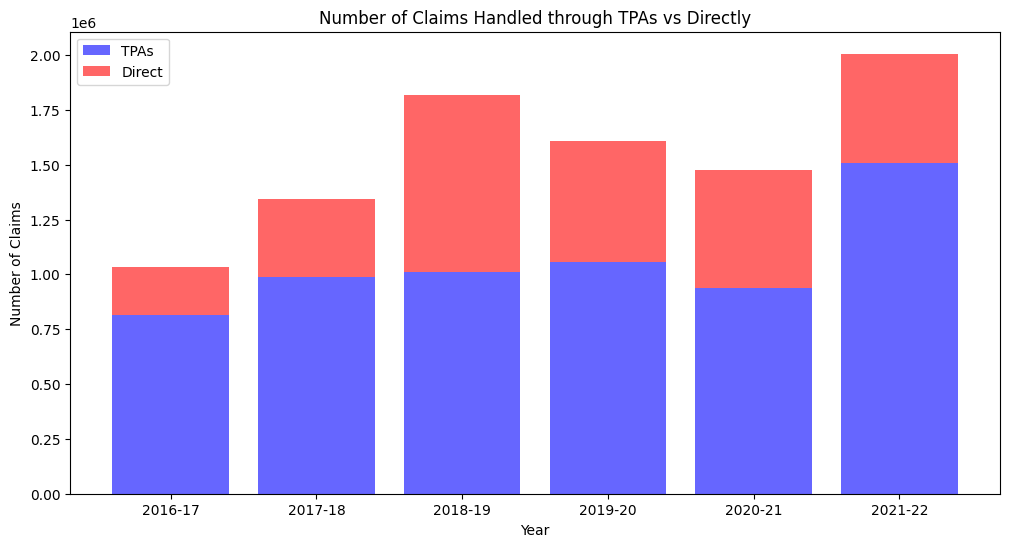

In [150]:
def plot_claims_number_stacked_bar(df4):
    # Extract relevant columns
    tpa_cols = [col for col in df4.columns if 'Total Number' in col and 'TPAs' in col]
    direct_cols = [col for col in df4.columns if 'Total number' in col and 'directly' in col]

    # Data for plotting
    tpa_data = df4[tpa_cols].sum()
    direct_data = df4[direct_cols].sum()

    years = [col.split('(')[-1].strip(')') for col in tpa_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(years, tpa_data, label='TPAs', color='b', alpha=0.6)
    plt.bar(years, direct_data, bottom=tpa_data, label='Direct', color='r', alpha=0.6)
    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Number of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_claims_number_stacked_bar(df4)


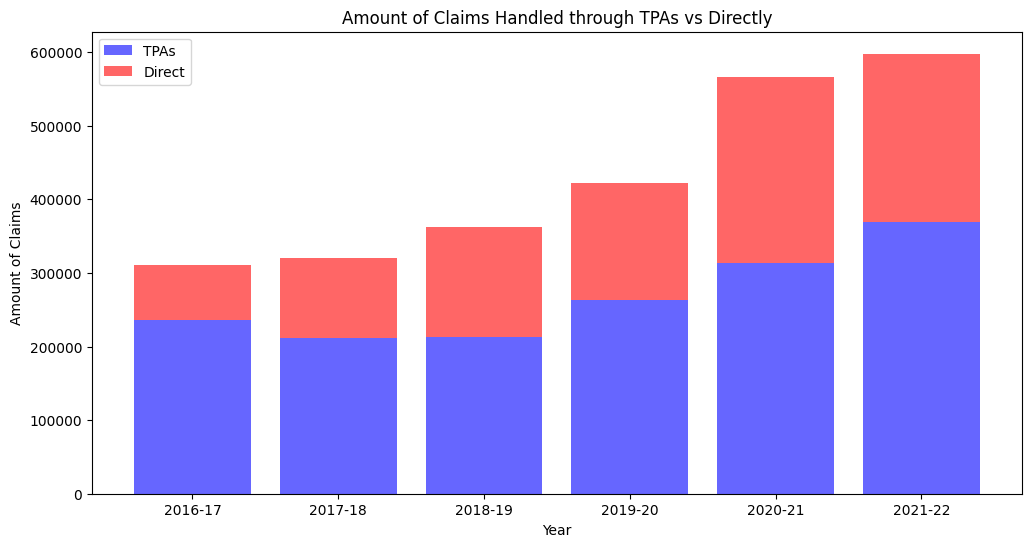

In [151]:
def plot_claims_amount_stacked_bar(df4):
    # Extract relevant columns
    tpa_cols = [col for col in df4.columns if 'Total Amount' in col and 'TPAs' in col]
    direct_cols = [col for col in df4.columns if 'Total amount' in col and 'directly' in col]

    # Data for plotting
    tpa_data = df4[tpa_cols].sum()
    direct_data = df4[direct_cols].sum()

    years = [col.split('(')[-1].strip(')') for col in tpa_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(years, tpa_data, label='TPAs', color='b', alpha=0.6)
    plt.bar(years, direct_data, bottom=tpa_data, label='Direct', color='r', alpha=0.6)
    plt.xlabel('Year')
    plt.ylabel('Amount of Claims')
    plt.title('Amount of Claims Handled through TPAs vs Directly')
    plt.legend()
    plt.show()

plot_claims_amount_stacked_bar(df4)


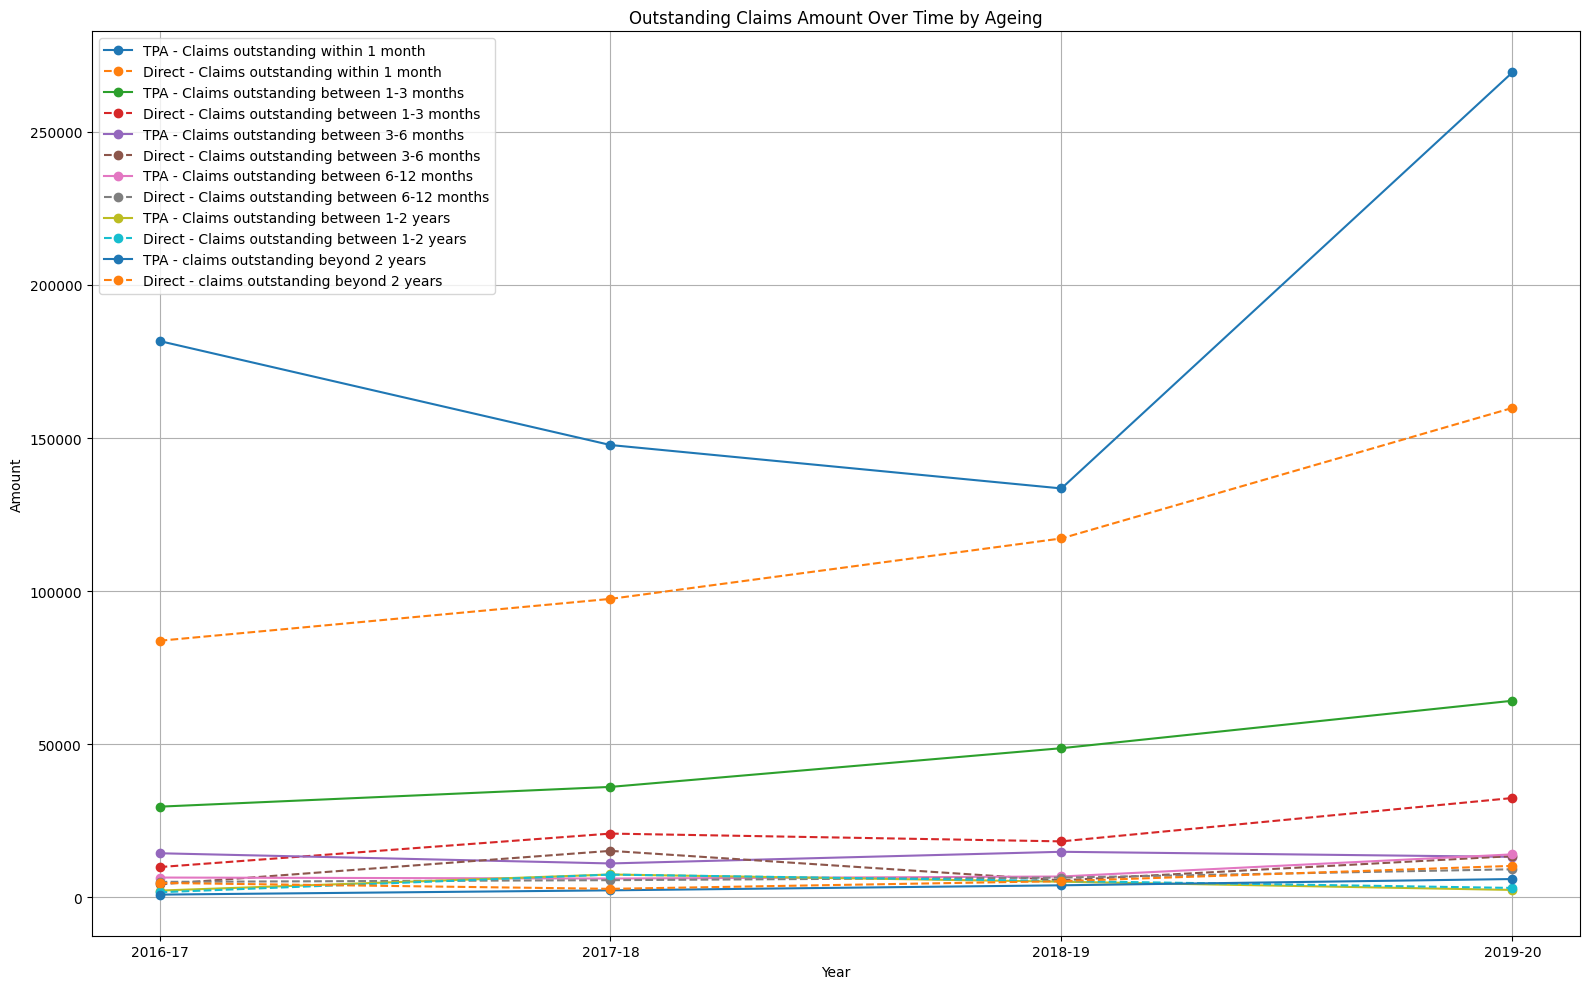

In [152]:

def plot_claims_amount_line_df4(df):
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
    rows_to_plot = ['Claims outstanding within 1 month', 'Claims outstanding between 1-3 months',
                    'Claims outstanding between 3-6 months', 'Claims outstanding between 6-12 months',
                    'Claims outstanding between 1-2 years', 'claims outstanding beyond 2 years']

    plt.figure(figsize=(16, 10))
    for ageing in rows_to_plot:
        tpa_columns = [f'For Claims Handled through TPAs Total Amount ({year})' for year in years]
        direct_columns = [f'For Claims handled directly Total amount  ({year})' for year in years]

        tpa_amounts = [df.loc[df['Ageing of outstanding claims**'] == ageing, col].values[0] for col in tpa_columns if col in df.columns]
        direct_amounts = [df.loc[df['Ageing of outstanding claims**'] == ageing, col].values[0] for col in direct_columns if col in df.columns]

        plt.plot(years[:len(tpa_amounts)], tpa_amounts, marker='o', linestyle='-', label=f'TPA - {ageing}')
        plt.plot(years[:len(direct_amounts)], direct_amounts, marker='o', linestyle='--', label=f'Direct - {ageing}')

    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title('Outstanding Claims Amount Over Time by Ageing')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_claims_amount_line_df4(df4)


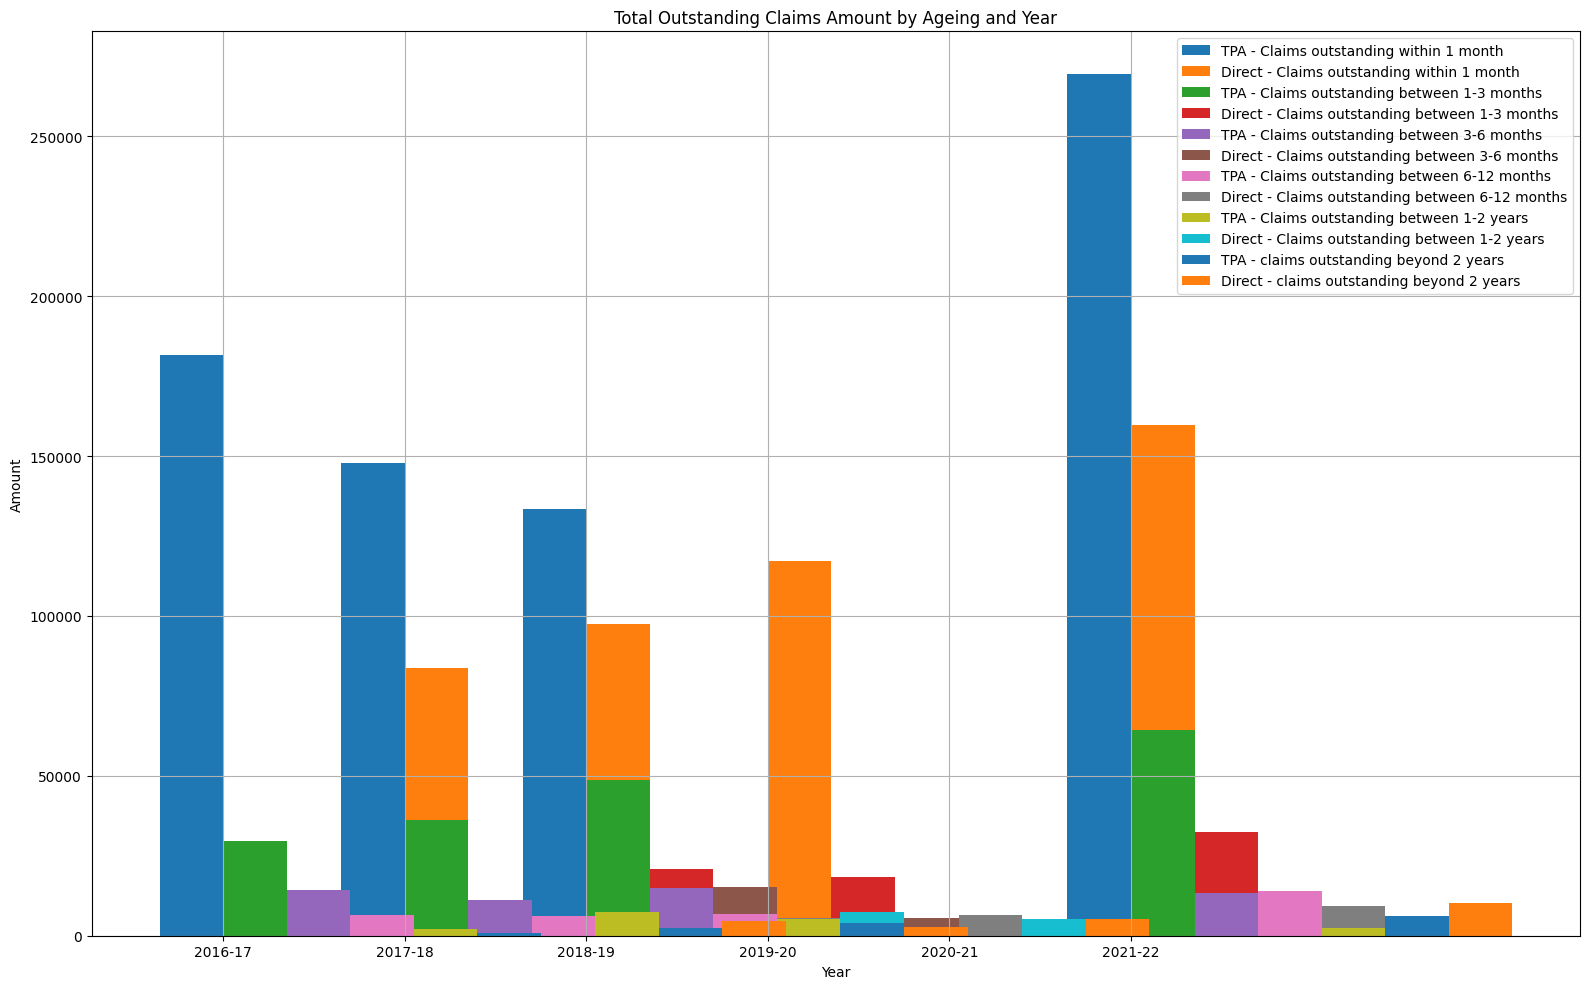

In [153]:

def plot_claims_amount_bar_df4(df):
    ageing_categories = df['Ageing of outstanding claims**']
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

    tpa_data = {}
    direct_data = {}

    for ageing in ageing_categories:
        tpa_amounts = [df.loc[df['Ageing of outstanding claims**'] == ageing, f'For Claims Handled through TPAs Total Amount ({year})'].values[0] if f'For Claims Handled through TPAs Total Amount ({year})' in df.columns else 0 for year in years]
        direct_amounts = [df.loc[df['Ageing of outstanding claims**'] == ageing, f'For Claims handled directly Total amount  ({year})'].values[0] if f'For Claims handled directly Total amount  ({year})' in df.columns else 0 for year in years]

        tpa_data[ageing] = tpa_amounts
        direct_data[ageing] = direct_amounts

    x = np.arange(len(years))
    width = 0.35

    plt.figure(figsize=(16, 10))

    for i, ageing in enumerate(ageing_categories):
        pos = x + i * width

        plt.bar(pos - width/2, tpa_data[ageing], width, label=f'TPA - {ageing}')
        plt.bar(pos + width/2, direct_data[ageing], width, label=f'Direct - {ageing}')

    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title('Total Outstanding Claims Amount by Ageing and Year')
    plt.xticks(x, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_claims_amount_bar_df4(df4)


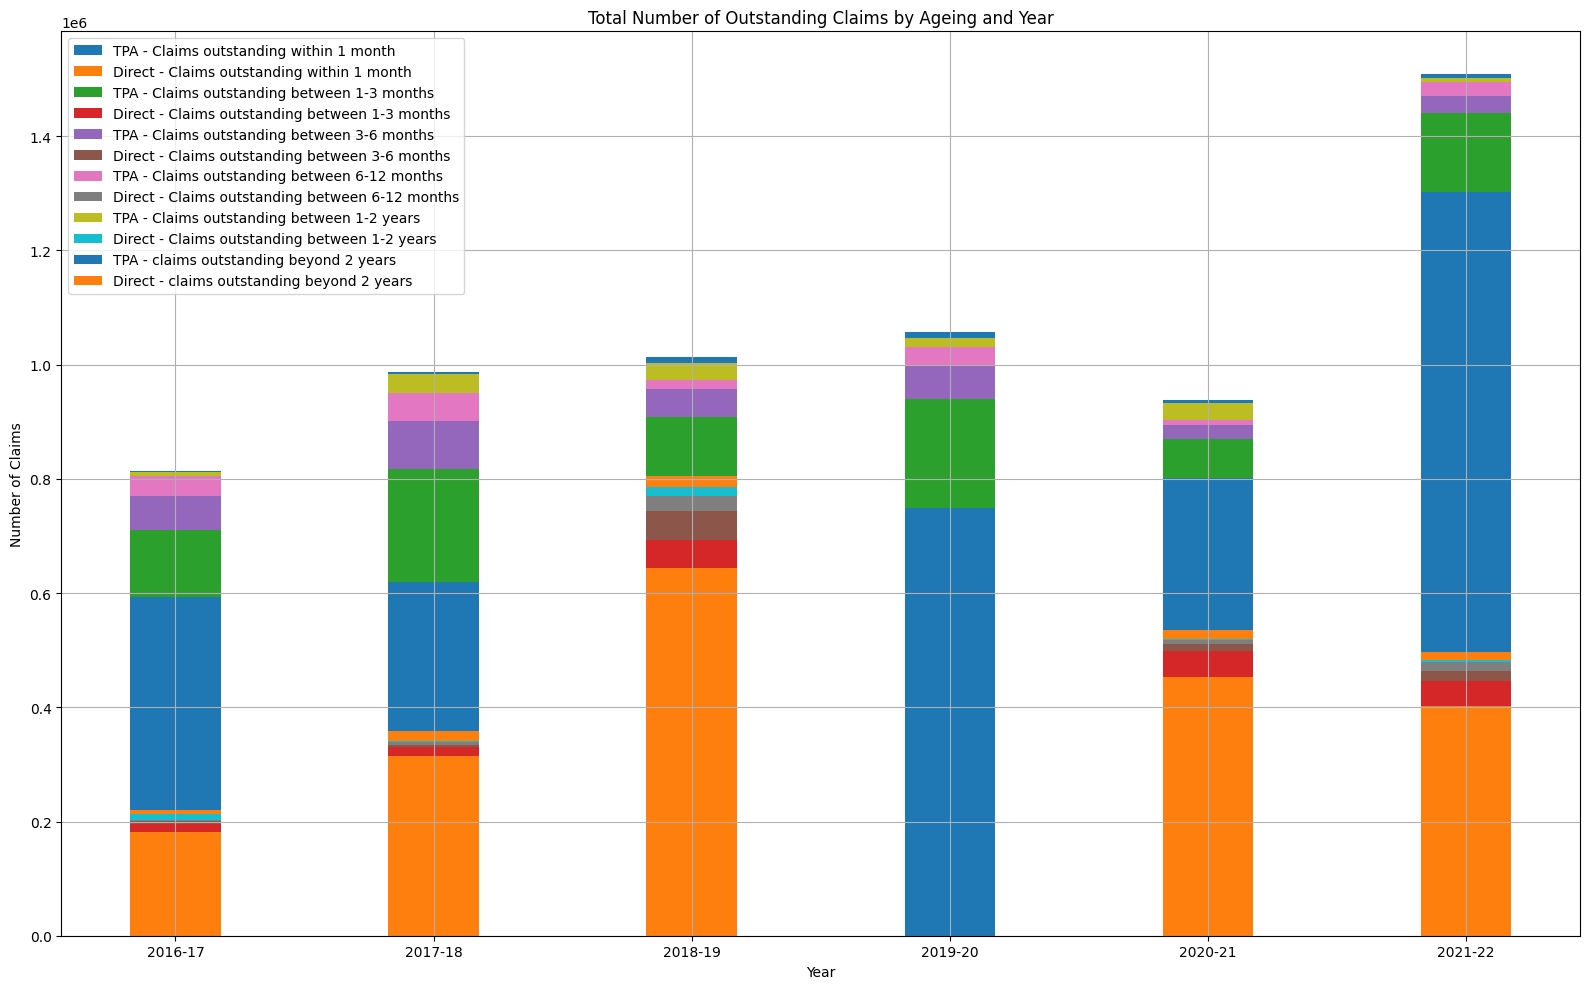

In [154]:

def plot_claims_number_stacked_bar_df4(df):
    ageing_categories = df['Ageing of outstanding claims**']
    years = ['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']

    tpa_data = {}
    direct_data = {}

    for ageing in ageing_categories:
        tpa_numbers = [df.loc[df['Ageing of outstanding claims**'] == ageing, f'For Claims Handled through TPAs Total Number ({year})'].values[0] if f'For Claims Handled through TPAs Total Number ({year})' in df.columns else 0 for year in years]
        direct_numbers = [df.loc[df['Ageing of outstanding claims**'] == ageing, f'For Claims handled directly Total number ({year})'].values[0] if f'For Claims handled directly Total number ({year})' in df.columns else 0 for year in years]

        tpa_data[ageing] = tpa_numbers
        direct_data[ageing] = direct_numbers

    x = np.arange(len(years))
    width = 0.35

    plt.figure(figsize=(16, 10))

    for i, ageing in enumerate(ageing_categories):
        tpa_numbers = tpa_data[ageing]
        direct_numbers = direct_data[ageing]

        pos = x

        plt.bar(pos, tpa_numbers, width, label=f'TPA - {ageing}', bottom=np.sum([tpa_data[a] for a in ageing_categories[:i]], axis=0))
        plt.bar(pos, direct_numbers, width, label=f'Direct - {ageing}', bottom=np.sum([direct_data[a] for a in ageing_categories[:i]], axis=0))

    plt.xlabel('Year')
    plt.ylabel('Number of Claims')
    plt.title('Total Number of Outstanding Claims by Ageing and Year')
    plt.xticks(x, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_claims_number_stacked_bar_df4(df4)
